In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import torch

from scipy.stats import wilcoxon


In [197]:
DATASET_DIR = "data"
BASELINE_DATA_DIR = "logs/experiments/baselines/production"
SSDGM_DATA_DIR = "notebooks"

IMAGE_OUTPUT_DIR = "/home/flo/ssdgm/images/"


In [181]:

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    "pgf.texsystem": "pdflatex",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

## Datasets

In [3]:
dataset_files = glob.glob(DATASET_DIR + "/**/*.pt", recursive=True)

for file in dataset_files:
    ds_name = os.path.basename(file).split('.')[0]
    X, y  = torch.load(file)
    print(f"{ds_name} shape: {X.shape}")

elevators shape: torch.Size([16599, 18])
protein shape: torch.Size([45730, 9])
skillcraft shape: torch.Size([3329, 18])
ctslice shape: torch.Size([53500, 379])
electric shape: torch.Size([2049280, 6])
blog shape: torch.Size([52397, 276])
parkinson shape: torch.Size([5875, 19])
buzz shape: torch.Size([583250, 77])


## Baselines

In [14]:
dummy_file = BASELINE_DATA_DIR + "/Dummy/df_optuna_results.csv"
lr_file = BASELINE_DATA_DIR + "/LR/df_optuna_results.csv"
rfr_file = BASELINE_DATA_DIR + "/RFR/df_optuna_results_1000.csv"
svr_file = BASELINE_DATA_DIR + "/SVR/df_optuna_results_1000.csv"
ridge_file = BASELINE_DATA_DIR + "/Ridge/df_optuna_results_1000.csv"

baseline_files = [dummy_file, lr_file, ridge_file, svr_file, rfr_file]

print("files: ", baseline_files)
df_list = []
for file in baseline_files:
    df = pd.read_csv(file)
    df_list.append(df)

df_baselines = pd.concat(df_list)
len(df_baselines)

files:  ['logs/experiments/baselines/production/Dummy/df_optuna_results.csv', 'logs/experiments/baselines/production/LR/df_optuna_results.csv', 'logs/experiments/baselines/production/Ridge/df_optuna_results_1000.csv', 'logs/experiments/baselines/production/SVR/df_optuna_results_1000.csv', 'logs/experiments/baselines/production/RFR/df_optuna_results_1000.csv']


4500

In [15]:
df_baselines[(df_baselines["regressor_name"] == "Ridge") & (df_baselines["dataset"] == "blog") & (df_baselines["n_train_samples"] == 100)]

,regressor_name,dataset,n_train_samples,run,mse,rmse,explained_variance,mae,mape,r2
750,Ridge,blog,100,0,26.170260,5.115687,0.040968,1.359637,1.105916,0.034552
751,Ridge,blog,100,1,26.477242,5.145604,0.039419,1.373844,1.109797,0.033332
752,Ridge,blog,100,2,25.741987,5.073656,0.049438,1.326323,1.080624,0.042441
753,Ridge,blog,100,3,26.639015,5.161300,0.044033,1.348955,1.103525,0.036865
754,Ridge,blog,100,4,32.811836,5.728162,0.038896,1.484059,1.182855,0.030906
755,Ridge,blog,100,5,28.756790,5.362536,0.045615,1.379793,1.185870,0.037401
756,Ridge,blog,100,6,41.156956,6.415369,0.008681,1.616558,1.200087,-0.002294
757,Ridge,blog,100,7,26.398468,5.137944,0.041833,1.333110,1.135337,0.033945
758,Ridge,blog,100,8,27.640574,5.257430,0.052207,1.369507,1.090871,0.044978
759,Ridge,blog,100,9,27.052525,5.201204,0.041799,1.348352,1.165606,0.033601


## SSDGM

In [16]:
df_ssdgm = pd.read_csv(os.path.join(SSDGM_DATA_DIR, "ssdgm_results.csv"))
len(df_ssdgm)

<ipython-input-16-2a47c23804a8>:1: DtypeWarning: Columns (83,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ssdgm = pd.read_csv(os.path.join(SSDGM_DATA_DIR, "ssdgm_results.csv"))


7200

## Processing

In [17]:
df_base = df_baselines[["regressor_name", "dataset", "n_train_samples", "rmse", "r2", "mae", "mape"]]
df_base

,regressor_name,dataset,n_train_samples,rmse,r2,mae,mape
0,Dummy,skillcraft,100,1.081828,-0.010153,0.884033,1.000000
1,Dummy,skillcraft,100,1.151261,-0.021616,0.943698,1.000000
2,Dummy,skillcraft,100,1.084627,-0.023942,0.889356,1.000000
3,Dummy,skillcraft,100,1.080849,-0.011767,0.883821,1.000000
4,Dummy,skillcraft,100,1.117411,-0.010153,0.913110,1.000000
...,...,...,...,...,...,...,...
895,RFR,blog,500,2.233457,0.051102,0.569465,0.960030
896,RFR,blog,500,2.260515,0.072392,0.584862,1.272626
897,RFR,blog,500,2.356509,0.056948,0.621641,1.484195
898,RFR,blog,500,2.334752,0.042009,0.624616,1.049517


add columns `regressor_name` and `dataset` to SSDGM dataframe

In [18]:
df_ssdgm["regressor_name"] = df_ssdgm.loc[:, "Group"].apply(lambda x: x.split('-')[0])
df_ssdgm["dataset"] = df_ssdgm.loc[:, "Group"].apply(lambda x: x.split('-')[1])


select respective columns from SSDGM dataframe

In [19]:
df_ssdgm_new = df_ssdgm[["regressor_name", "dataset", "datamodule/n_samples_train_labeled", "test/RMSE", "test/R2","test/MAE", "test/MAPE"]]
df_ssdgm_new = df_ssdgm_new.rename(columns={"datamodule/n_samples_train_labeled": "n_train_samples", "test/RMSE": "rmse", "test/R2": "r2", "test/MAE": "mae", "test/MAPE": "mape"})

In [215]:
df = pd.concat([df_base, df_ssdgm_new])

rename_dict = {"mlp": "MLP",
               "m2vae": "M2R",
               "autoencoderregressor": "AE+R",
               "deterministicpredictor": "VAE+D",
               "probabilisticpredictor": "VAE+P",
               "srgan": "SR-GAN",
               "semigan": "SemiGAN",
               "ssdkl": "SSDKL",
               "SVR+rbf": "SVR"}

df["regressor_name"] = df["regressor_name"].replace(rename_dict)
df = df.reset_index(drop=True)
df = df.rename(columns={"regressor_name": "model"})
df

,model,dataset,n_train_samples,rmse,r2,mae,mape
0,Dummy,skillcraft,100,1.081828,-0.010153,0.884033,1.000000
1,Dummy,skillcraft,100,1.151261,-0.021616,0.943698,1.000000
2,Dummy,skillcraft,100,1.084627,-0.023942,0.889356,1.000000
3,Dummy,skillcraft,100,1.080849,-0.011767,0.883821,1.000000
4,Dummy,skillcraft,100,1.117411,-0.010153,0.913110,1.000000
...,...,...,...,...,...,...,...
11695,M2R,skillcraft,100,7.541310,-42.836227,0.914519,1.578952
11696,MLP,skillcraft,100,0.837928,0.388878,0.690316,0.970867
11697,M2R,skillcraft,100,8.964700,-68.365265,0.894940,1.589471
11698,MLP,skillcraft,100,9.940840,-75.170319,0.966656,1.620538


In [21]:
grouped = df.groupby(by=["model", "dataset", "n_train_samples"]).agg([np.mean, np.std])
grouped

rmse                    r2              \
                                       mean       std        mean         std   
model dataset    n_train_samples                                                
AE+R  blog       100               5.525716  0.379679   -0.032824    0.021674   
                 200               3.358439  0.234365   -0.019758    0.028516   
                 300               2.966315  0.272778    0.004629    0.031075   
                 400               3.124774  0.183871    0.009600    0.026410   
                 500               2.270913  0.097195    0.017430    0.021511   
...                                     ...       ...         ...         ...   
VAE+P skillcraft 100               3.930371  3.096524  -20.179446   47.959545   
                 200               2.641723  2.200777   -8.986443   23.821167   
                 300               9.028632  5.354287 -102.076838   90.997158   
                 400              11.845284  5.071041 -160.456612  115.971883   
                 500              12.664523  5.419110 -192.325002  144.673380   

                                       mae                  mape              
                                      mean       std        mean         std  
model dataset    n_train_samples                                              
AE+R  blog       100              1.421045  0.079635    0.978111    0.046563  
                 200              0.939083  0.061079    1.094189    0.257176  
                 300              0.807059  0.069778  104.964419  564.259963  
                 400              0.876434  0.079799    1.457749    1.981184  
                 500              0.667155  0.078037    0.931971    0.191933  
...                                    ...       ...         ...         ...  
VAE+P skillcraft 100              0.963980  0.091415    1.251601    0.224424  
                 200              0.814253  0.083056    1.068245    0.202905  
                 300              0.941681  0.159392    1.657655    0.380874  
                 400              1.037413  0.121746    2.362439    0.396742  
                 500              1.024005  0.168840    2.491354    0.386785  

[390 rows x 8 columns]

In [22]:
df[(df["dataset"] == "skillcraft") & (df["model"] == "M2R") & (df["n_train_samples"] == 100)]

,model,dataset,n_train_samples,rmse,r2,mae,mape
11549,M2R,skillcraft,100,9.070738,-69.823067,0.906861,1.559747
11555,M2R,skillcraft,100,7.196499,-43.713036,0.850346,1.468968
11559,M2R,skillcraft,100,9.255536,-60.998604,0.960910,1.467856
11565,M2R,skillcraft,100,9.864555,-83.902046,0.934356,1.604648
11572,M2R,skillcraft,100,8.294336,-53.185539,0.915331,1.649473
11578,M2R,skillcraft,100,10.559679,-93.474243,0.943446,1.670368
11582,M2R,skillcraft,100,8.603661,-61.916241,0.906233,1.566605
11587,M2R,skillcraft,100,11.454887,-106.646194,1.007247,1.653454
11591,M2R,skillcraft,100,8.661317,-61.139050,0.902501,1.569915
11596,M2R,skillcraft,100,10.431933,-94.106491,0.945037,1.677680


## Metrics Tables

In [87]:
df_grouped = df.groupby(by=["model", "dataset", "n_train_samples"]).agg([np.mean])
df_grouped

rmse          r2       mae        mape
                                       mean        mean      mean        mean
model dataset    n_train_samples                                             
AE+R  blog       100               5.525716   -0.032824  1.421045    0.978111
                 200               3.358439   -0.019758  0.939083    1.094189
                 300               2.966315    0.004629  0.807059  104.964419
                 400               3.124774    0.009600  0.876434    1.457749
                 500               2.270913    0.017430  0.667155    0.931971
...                                     ...         ...       ...         ...
VAE+P skillcraft 100               3.930371  -20.179446  0.963980    1.251601
                 200               2.641723   -8.986443  0.814253    1.068245
                 300               9.028632 -102.076838  0.941681    1.657655
                 400              11.845284 -160.456612  1.037413    2.362439
                 500              12.664523 -192.325002  1.024005    2.491354

[390 rows x 4 columns]

In [83]:
DATASETS = ["skillcraft", "parkinson", "elevators", "protein", "blog", "ctslice"]
MODELS = ["Dummy", "LR", "Ridge", "RFR", "SVR"] + list(rename_dict.values())

idx = pd.IndexSlice
res_list = []

for ds in DATASETS:
    # Get the dataframe rows for the dataset `ds`
    df_ds = df_grouped.loc[idx[:, ds], :]
    for name, group in df_ds.groupby(level=0):
        res_list.append(group)

df_res = pd.concat(res_list).reset_index()

# drop the keyword "mean" from second column level
df_res = df_res.droplevel(level=1, axis=1)



In [84]:
def df_to_eval_latex_table(df, metric: str, order_dataset_by: str = "samples"):

 
    # pivot the dataframe into evaluation table
    df_res = pd.pivot_table(data=df, values=[metric], index=["model"], columns=["n_train_samples", "dataset"])
    

    index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
    
    if order_dataset_by == "samples" :
        column_order = ["skillcraft", "parkinson", "elevators", "protein", "blog", "ctslice"]
    elif order_dataset_by == "features":
        column_order = ["protein", "skillcraft", "elevators", "parkinson", "blog", "ctslice"]
    
    df_res = df_res.reindex(index=index_order, columns=pd.MultiIndex.from_product([[metric], range(100, 600, 100), column_order], names=["metric", "n", "dataset"]))

    for n in range(100, 600, 100):
        print(f'################# N: {n} #########################')
        #print(df_res.loc[idx[:], idx[metric, n, ]])
        print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
        print('##########################################')
    
    return df_res

### $R^2$ Tables

In [85]:
dff = df_to_eval_latex_table(df_res, "r2")

################# N: 100 #########################
\begin{tabular}{lrrrrrr}
\toprule
metric & \multicolumn{6}{l}{r2} \\
n & \multicolumn{6}{l}{100} \\
dataset &  skillcraft & parkinson & elevators &   protein &      blog &   ctslice \\
model   &             &           &           &           &           &           \\
\midrule
Dummy   &   -0.017319 & -1.253015 & -0.008956 & -0.012400 & -0.007811 & -0.551535 \\
LR      &    0.234094 & -1.370276 & -0.105113 &  0.050103 & -0.646203 & -0.564989 \\
Ridge   &    0.038087 & -1.370993 & -0.105450 &  0.155009 &  0.036011 & -0.548946 \\
SVR+rbf &    0.479899 & -1.307621 &  0.194904 & -0.099408 &  0.003235 & -0.642165 \\
RFR     &    0.510534 & -1.434581 &  0.273348 &  0.131973 &  0.041571 & -0.687590 \\
MLP     &  -32.242210 & -0.000963 &  0.602979 &  0.133424 & -0.030764 &  0.803910 \\
AE+R    & -172.228775 & -0.074411 &  0.333650 & -0.040736 & -0.040360 & -0.000632 \\
VAE+D   & -149.986664 & -0.026534 &  0.351398 & -0.032363 & -0.023076 &  0.

<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments

In [17]:
idx = pd.IndexSlice
print((dff.loc[:, idx["r2", 100]] < dff.loc[:, idx["r2", 200]]).sum().sum())
print((dff.loc[:, idx["r2", 200]] < dff.loc[:, idx["r2", 300]]).sum().sum())
print((dff.loc[:, idx["r2", 300]] < dff.loc[:, idx["r2", 400]]).sum().sum())
print((dff.loc[:, idx["r2", 400]] < dff.loc[:, idx["r2", 500]]).sum().sum())

65
59
58
53


In [18]:

dff.loc[:, idx["r2", 100, "parkinson"]] < dff.loc[:, idx["r2", 200, "parkinson"]]

model
Dummy       True
LR         False
Ridge      False
SVR+rbf     True
RFR         True
MLP         True
AE+R        True
VAE+D       True
VAE+P       True
M2R         True
SemiGAN     True
SR-GAN      True
SSDKL       True
dtype: bool

In [19]:
df_to_eval_latex_table(df_res, "r2", order_dataset_by="features")

################# N: 100 #########################
\begin{tabular}{lrrrrrr}
\toprule
metric & \multicolumn{6}{l}{r2} \\
n & \multicolumn{6}{l}{100} \\
dataset &   protein &  skillcraft & elevators & parkinson &          blog &   ctslice \\
model   &           &             &           &           &               &           \\
\midrule
Dummy   & -0.013479 &   -0.020267 & -0.008915 & -1.253583 & -8.010788e-03 & -0.551041 \\
LR      &  0.050660 &   -0.788798 & -0.080806 & -1.370008 & -3.379809e+07 & -0.562621 \\
Ridge   &  0.154798 &   -0.311641 & -0.081138 & -1.370679 &  3.401849e-02 & -0.547560 \\
SVR+rbf & -0.260598 &    0.469554 &  0.219527 & -1.308295 & -3.040174e-03 & -0.641926 \\
RFR     &  0.155562 &    0.500857 &  0.288439 & -1.433936 &  3.986631e-02 & -0.684942 \\
MLP     &  0.113565 &  -43.846568 &  0.583312 & -0.215273 & -2.764271e-02 &  0.769347 \\
AE+R    & -0.555760 & -202.745020 &  0.249065 & -0.129986 & -3.282406e-02 & -1.129007 \\
VAE+D   & -0.052297 & -157.351289 &  0.

<ipython-input-15-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-15-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-15-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments

metric         r2                                                          \
n             100                                                           
dataset   protein  skillcraft elevators parkinson          blog   ctslice   
model                                                                       
Dummy   -0.013479   -0.020267 -0.008915 -1.253583 -8.010788e-03 -0.551041   
LR       0.050660   -0.788798 -0.080806 -1.370008 -3.379809e+07 -0.562621   
Ridge    0.154798   -0.311641 -0.081138 -1.370679  3.401849e-02 -0.547560   
SVR+rbf -0.260598    0.469554  0.219527 -1.308295 -3.040174e-03 -0.641926   
RFR      0.155562    0.500857  0.288439 -1.433936  3.986631e-02 -0.684942   
MLP      0.113565  -43.846568  0.583312 -0.215273 -2.764271e-02  0.769347   
AE+R    -0.555760 -202.745020  0.249065 -0.129986 -3.282406e-02 -1.129007   
VAE+D   -0.052297 -157.351289  0.295405 -0.253869 -2.004488e-02  0.410588   
VAE+P   -0.036871  -20.179446  0.332558 -0.271254 -4.416558e-02 -0.444982   
M2R      0.011171  -65.682118  0.810831  0.100981  1.693847e-01  0.896889   
SemiGAN  0.038747  -55.385233  0.730805  0.058206 -1.511039e-02  0.803715   
SR-GAN   0.151542  -27.492210  0.734221  0.095306  3.573421e-02  0.813277   
SSDKL    0.069331    0.373685  0.772545 -0.010854 -2.566554e-02  0.854735   

metric                                            ...                      \
n             200                                 ...       400             
dataset   protein skillcraft elevators parkinson  ... elevators parkinson   
model                                             ...                       
Dummy   -0.009764  -0.052960 -0.003098 -0.306496  ... -0.018487 -0.010153   
LR       0.147929  -1.526828  0.750261 -2.644860  ...  0.590499 -0.232781   
Ridge    0.168853  -1.173553  0.750337 -2.647639  ...  0.590713 -0.232580   
SVR+rbf -0.079953   0.454265  0.283745 -0.132527  ...  0.300069 -0.142294   
RFR      0.192535   0.521115  0.306688 -0.220839  ...  0.350200 -0.753723   
MLP      0.208431 -58.816767  0.781417  0.107391  ...  0.860042  0.325415   
AE+R     0.040390 -69.883968  0.294714  0.009813  ...  0.410210  0.100354   
VAE+D    0.100111 -53.428627  0.367992 -0.022206  ...  0.429417  0.059784   
VAE+P    0.037090  -8.986443  0.387987  0.034974  ...  0.443456  0.100353   
M2R      0.153489 -52.846770  0.861067  0.296112  ...  0.890943  0.471325   
SemiGAN  0.169704 -53.604410  0.813153  0.296833  ...  0.866198  0.499840   
SR-GAN   0.234248 -32.933664  0.819465  0.299625  ...  0.866662  0.457225   
SSDKL    0.226773   0.484275  0.815207  0.135480  ...  0.887253  0.351932   

metric                                                                       \
n                                       500                                   
dataset          blog     ctslice   protein  skillcraft elevators parkinson   
model                                                                         
Dummy   -2.147096e-03   -1.032589 -0.001217   -0.000761 -0.041193 -0.004336   
LR      -9.783772e+08 -509.665364  0.209233  -21.321024  0.527960 -0.626828   
Ridge    8.532599e-02   -1.018982  0.201788  -16.077875  0.528260 -0.627454   
SVR+rbf  3.515864e-03   -0.779297  0.142376    0.540219  0.269936 -0.226810   
RFR      4.185902e-02   -0.657300  0.259415    0.600441  0.362581 -0.447437   
MLP      8.470867e-03    0.895369  0.265002   -1.056714  0.877182  0.409314   
AE+R     9.600176e-03    0.799738  0.138594   -7.152539  0.405871  0.114560   
VAE+D   -1.277821e-02    0.893547  0.151112  -11.680463  0.429541  0.065233   
VAE+P   -2.307897e-02    0.836041  0.053147 -192.325002  0.442651  0.102373   
M2R      2.306960e-01    0.930636  0.255584    0.128992  0.896069  0.540398   
SemiGAN  9.780707e-02    0.925935  0.242469   -2.777363  0.876846  0.513868   
SR-GAN   7.154701e-02    0.922328  0.300172    0.124043  0.873390  0.517654   
SSDKL    3.189483e-01    0.917342  0.270796    0.485888  0.886617  0.362182   

metric                           
n 

In [255]:
df_rk = pd.pivot_table(data=df_res, values=["r2"], index=["model"], columns=["n_train_samples", "dataset"])
df_rk

r2                                                      \
n_train_samples       100                                                       
dataset              blog   ctslice elevators parkinson   protein  skillcraft   
model                                                                           
AE+R            -0.040360 -0.000632  0.333650 -0.074411 -0.040736 -172.228775   
Dummy           -0.007811 -0.551535 -0.008956 -1.253015 -0.012400   -0.017319   
LR              -0.646203 -0.564989 -0.105113 -1.370276  0.050103    0.234094   
M2R              0.154905  0.900101  0.811269  0.103223 -0.000588  -61.527645   
MLP             -0.030764  0.803910  0.602979 -0.000963  0.133424  -32.242210   
RFR              0.041571 -0.687590  0.273348 -1.434581  0.131973    0.510534   
Ridge            0.036011 -0.548946 -0.105450 -1.370993  0.155009    0.038087   
SR-GAN           0.032160  0.827545  0.746326  0.112544  0.159525  -23.540137   
SSDKL           -0.027615  0.856712  0.775014 -0.016503  0.047231    0.389701   
SVR+rbf          0.003235 -0.642165  0.194904 -1.307621 -0.099408    0.479899   
SemiGAN         -0.014476  0.804755  0.745069  0.066355  0.045372  -45.483160   
VAE+D           -0.023076  0.542502  0.351398 -0.026534 -0.032363 -149.986664   
VAE+P           -0.044448 -0.476972  0.387746 -0.105590 -0.024802   -8.574046   

                                                             ...            \
n_train_samples           200                                ...       400   
dataset                  blog   ctslice elevators parkinson  ... elevators   
model                                                        ...             
AE+R            -1.294738e-02  0.648261  0.387180  0.018358  ...  0.431717   
Dummy           -2.857267e-03 -0.546578 -0.002816 -0.301696  ... -0.018286   
LR              -1.537054e+09 -0.521188  0.746637 -2.632779  ...  0.593812   
M2R              2.009947e-01  0.922431  0.860123  0.325113  ...  0.892398   
MLP             -1.407087e-02  0.859948  0.827187  0.117764  ...  0.865498   
RFR              2.495040e-02 -0.672842  0.295142 -0.207297  ...  0.355325   
Ridge            3.122271e-02 -0.488192  0.746723 -2.634779  ...  0.594037   
SR-GAN           8.565843e-03  0.870915  0.821848  0.301738  ...  0.870936   
SSDKL            2.959049e-02  0.894072  0.833770  0.126768  ...  0.888301   
SVR+rbf          9.059481e-04 -0.692542  0.247516 -0.122028  ...  0.252123   
SemiGAN          1.916677e-02  0.882109  0.818654  0.329967  ...  0.868750   
VAE+D           -1.020527e-02  0.846364  0.433028  0.040679  ...  0.439606   
VAE+P           -3.045303e-02  0.791328  0.443614  0.045781  ...  0.450993   

                                                                         \
n_train_samples                                           500             
dataset         parkinson   protein  skillcraft          blog   ctslice   
model                                                                     
AE+R             0.113631  0.160233   -1.321724  2.236354e-02  0.834358   
Dummy           -0.010224 -0.000653   -0.001241 -4.489798e-05 -1.072561   
LR              -0.235061  0.192027   -9.065413 -1.498677e+09 -1.100663   
M2R              0.493265  0.251916   -1.679416  2.706121e-01  0.930707   
MLP              0.364047  0.278609   -6.692945 -1.015365e-03  0.903636   
RFR             -0.740642  0.227632    0.592941  4.583105e-02 -0.676822   
Ridge           -0.234563  0.189874   -7.667254  1.611030e-01 -1.051299   
SR-GAN           0.467295  0.285359   -1.805590  1.118907e-01  0.932906   
SSDKL            0.390427  0.251371    0.516605  3.342923e-01  0.935068   
SVR+rbf         -0.132497  0.074328    0.531128 -5.607111e-03 -0.764323   
SemiGAN          0.505065  0.232678  -13.807028  9.155777e-02  0.934602   
VAE+D            0.077150  0.162111   -3.102214  1.147091e-03  0.899353   
VAE+P            0.100429  0.077046 -158.236732 -1.789558e-02  0.834618   

                                          

In [256]:
df_rank = df_rk.loc[:, idx["r2", :]].rank(ascending=False)
df_rank.apply(pd.Series.value_counts, axis=1)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
model,,,,,,,,,,,,,
AE+R,NaN,NaN,NaN,NaN,1.0,5.0,5.0,6.0,1.0,6.0,3.0,2.0,1.0
Dummy,NaN,NaN,NaN,3.0,NaN,2.0,1.0,1.0,8.0,1.0,3.0,4.0,7.0
LR,NaN,NaN,NaN,1.0,1.0,1.0,7.0,1.0,NaN,1.0,4.0,6.0,8.0
M2R,13.0,5.0,3.0,3.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN
MLP,NaN,1.0,6.0,3.0,9.0,1.0,NaN,1.0,3.0,4.0,1.0,NaN,1.0
RFR,4.0,2.0,NaN,3.0,4.0,2.0,NaN,NaN,4.0,1.0,5.0,1.0,4.0
Ridge,NaN,2.0,2.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,6.0,1.0,3.0
SR-GAN,6.0,1.0,9.0,5.0,3.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
SSDKL,4.0,11.0,6.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [257]:
df_rank

r2                                                       \
n_train_samples   100                                                  200   
dataset          blog ctslice elevators parkinson protein skillcraft  blog   
model                                                                        
AE+R             11.0     7.0       8.0       7.0    12.0       13.0  10.0   
Dummy             6.0    10.0      11.0       9.0     9.0        6.0   8.0   
LR               13.0    11.0      12.0      11.0     5.0        4.0  13.0   
M2R               1.0     1.0       1.0       2.0     8.0       11.0   1.0   
MLP              10.0     5.0       5.0       4.0     3.0        9.0  11.0   
RFR               2.0    13.0       9.0      13.0     4.0        1.0   4.0   
Ridge             3.0     9.0      13.0      12.0     2.0        5.0   2.0   
SR-GAN            4.0     3.0       3.0       1.0     1.0        8.0   6.0   
SSDKL             9.0     2.0       2.0       5.0     6.0        3.0   3.0   
SVR+rbf           5.0    12.0      10.0      10.0    13.0        2.0   7.0   
SemiGAN           7.0     4.0       4.0       3.0     7.0       10.0   5.0   
VAE+D             8.0     6.0       7.0       6.0    11.0       12.0   9.0   
VAE+P            12.0     8.0       6.0       8.0    10.0        7.0  12.0   

                                             ...                              \
n_train_samples                              ...       400                     
dataset         ctslice elevators parkinson  ... elevators parkinson protein   
model                                        ...                               
AE+R                8.0      10.0       8.0  ...      10.0       6.0    10.0   
Dummy              11.0      13.0      11.0  ...      13.0       9.0    13.0   
LR                 10.0       7.0      12.0  ...       7.0      12.0     7.0   
M2R                 1.0       1.0       2.0  ...       1.0       2.0     3.0   
MLP                 5.0       3.0       5.0  ...       5.0       5.0     2.0   
RFR                12.0      11.0      10.0  ...      11.0      13.0     6.0   
Ridge               9.0       6.0      13.0  ...       6.0      11.0     8.0   
SR-GAN              4.0       4.0       3.0  ...       3.0       3.0     1.0   
SSDKL               2.0       2.0       4.0  ...       2.0       4.0     4.0   
SVR+rbf            13.0      12.0       9.0  ...      12.0      10.0    12.0   
SemiGAN             3.0       5.0       1.0  ...       4.0       1.0     5.0   
VAE+D               6.0       9.0       7.0  ...       9.0       8.0     9.0   
VAE+P               7.0       8.0       6.0  ...       8.0       7.0    11.0   

                                                                      \
n_train_samples              500                                       
dataset         skillcraft  blog ctslice elevators parkinson protein   
model                                                                  
AE+R                   5.0   7.0     8.0      10.0       6.0    11.0   
Dummy                  4.0   9.0    12.0      13.0       9.0    13.0   
LR                    11.0  13.0    13.0       7.0      12.0     7.0   
M2R                    6.0   2.0     4.0       1.0       1.0     4.0   
MLP                    9.0  10.0     5.0       3.0       5.0     3.0   
RFR                    1.0   6.0     9.0      11.0      11.0     5.0   
Ridge                 10.0   3.0    11.0       6.0      13.0     8.0   
SR-GAN                 7.0   4.0     3.0       4.0       3.0     1.0   
SSDKL                  3.0   1.0     1.0       2.0       4.0     2.0   
SVR+rbf                2.0  11.0    10.0      12.0      10.0     9.0   
SemiGAN               12.0   5.0     2.0       5.0       2.0     6.0   
VAE+D                  8.0   8.0     6.0       9.0       8.0    10.0   
VAE+P                 13.0  12.0     7.0       8.0       7.0    12.0   

                            
n_train_samples             
dataset         skillcraft  
model              

In [46]:
df_rank.sum(axis=1).sort_values()

model
SemiGAN     47.0
SSDKL       59.0
M2R         79.0
SR-GAN     112.0
MLP        134.0
VAE+P      169.0
RFR        203.0
VAE+D      204.0
AE+R       226.0
Ridge      240.0
SVR+rbf    252.0
LR         259.0
Dummy      291.0
dtype: float64

In [24]:
df_rank = df_rank.apply(pd.Series.value_counts, axis=1).replace(to_replace={np.nan: 0}).rename_axis(columns='rank').astype('int32').replace(to_replace={0: '-'})
df_rank.columns = df_rank.columns.astype(int)

df_rank

rank,1,2,3,4,5,6,7,8,9,10,11,12,13
model,,,,,,,,,,,,,
AE+R,-,-,-,-,1,3,5,4,3,6,4,-,4
Dummy,-,-,-,4,-,2,1,-,7,2,3,5,6
LR,-,-,-,-,-,3,7,2,-,2,2,6,8
M2R,13,4,3,1,1,1,2,2,2,-,1,-,-
MLP,-,1,3,4,11,1,1,4,1,2,1,1,-
RFR,6,1,1,3,1,3,-,1,3,2,4,2,3
Ridge,-,1,2,3,3,6,1,2,2,-,6,1,3
SR-GAN,5,4,8,5,4,1,-,2,-,1,-,-,-
SSDKL,4,13,5,5,2,-,-,-,1,-,-,-,-


### SVR+lin vs SVR+rbf

In [25]:
df_svr_lin = pd.read_csv("/home/flo/ssdgm/logs/experiments/baselines/production/SVR/df_optuna_results_k.csv")
df_svr_rbf = pd.read_csv("/home/flo/ssdgm/logs/experiments/baselines/production/SVR/df_optuna_results.csv")

In [26]:
df_svr = pd.concat([df_svr_lin, df_svr_rbf], axis=0)
df_svr = df_svr[["regressor_name", "dataset", "n_train_samples", "r2", "rmse"]]
df_svr = df_svr.rename(columns={"regressor_name": "model", "r2": "$R^2$", "n_train_samples": "n"})
df_svr

,model,dataset,n,$R^2$,rmse
0,SVR,skillcraft,100,-0.951085,1.503498
1,SVR,skillcraft,100,-1.402839,1.765601
2,SVR,skillcraft,100,0.035615,1.052611
3,SVR,skillcraft,100,-1.370756,1.654506
4,SVR,skillcraft,100,-0.319913,1.277297
...,...,...,...,...,...
895,SVR+rbf,blog,500,0.000136,2.292653
896,SVR+rbf,blog,500,-0.007770,2.356165
897,SVR+rbf,blog,500,0.001784,2.424452
898,SVR+rbf,blog,500,0.000714,2.384542


In [27]:
df_compare_svr = pd.pivot_table(df_svr, values=["$R^2$", "rmse"], index=["dataset", "n"], columns=["model"])
df_compare_svr = df_compare_svr.drop(["ctslice", "parkinson", "protein", "blog", "elevators"])
print(df_compare_svr.to_latex())
#df_compare_svr

\begin{tabular}{llrrrr}
\toprule
           & {} & \multicolumn{2}{l}{\$R\textasciicircum 2\$} & \multicolumn{2}{l}{rmse} \\
           & model &        SVR &   SVR+rbf &       SVR &   SVR+rbf \\
dataset & n &            &           &           &           \\
\midrule
skillcraft & 100 &  -0.659707 &  0.469554 &  1.386776 &  0.796596 \\
           & 200 &  -1.177255 &  0.454265 &  1.559821 &  0.800273 \\
           & 300 &  -3.055450 &  0.455158 &  1.909730 &  0.760215 \\
           & 400 & -11.908412 &  0.512288 &  3.478243 &  0.706305 \\
           & 500 & -24.228643 &  0.540219 &  4.939834 &  0.670748 \\
\bottomrule
\end{tabular}



<ipython-input-27-39a04ce629fc>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_compare_svr.to_latex())


### RMSE Tables

In [86]:
df_to_eval_latex_table(df_res, "rmse")

################# N: 100 #########################
\begin{tabular}{lrrrrrr}
\toprule
metric & \multicolumn{6}{l}{rmse} \\
n & \multicolumn{6}{l}{100} \\
dataset & skillcraft & parkinson & elevators &   protein &      blog &   ctslice \\
model   &            &           &           &           &           &           \\
\midrule
Dummy   &   1.092446 &  3.927960 &  1.844218 &  0.952213 &  5.332974 &  4.164390 \\
LR      &   0.948631 &  4.028975 &  1.921739 &  0.919874 &  7.018763 &  4.179639 \\
Ridge   &   1.056694 &  4.029584 &  1.922091 &  0.866807 &  5.209186 &  4.159216 \\
SVR+rbf &   0.783113 &  3.962025 &  1.648375 &  0.987585 &  5.305168 &  4.281252 \\
RFR     &   0.759731 &  4.070245 &  1.564987 &  0.876988 &  5.200480 &  4.346234 \\
MLP     &   6.205992 &  2.637128 &  1.191480 &  0.877944 &  5.395372 &  1.503610 \\
AE+R    &  14.275012 &  2.701669 &  1.573010 &  0.968635 &  5.389987 &  3.342855 \\
VAE+D   &  13.183667 &  2.637913 &  1.515681 &  0.958502 &  5.348435 &  2.241951 \

<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-84-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments

metric        rmse                                                    \
n              100                                                     
dataset skillcraft parkinson elevators   protein      blog   ctslice   
model                                                                  
Dummy     1.092446  3.927960  1.844218  0.952213  5.332974  4.164390   
LR        0.948631  4.028975  1.921739  0.919874  7.018763  4.179639   
Ridge     1.056694  4.029584  1.922091  0.866807  5.209186  4.159216   
SVR+rbf   0.783113  3.962025  1.648375  0.987585  5.305168  4.281252   
RFR       0.759731  4.070245  1.564987  0.876988  5.200480  4.346234   
MLP       6.205992  2.637128  1.191480  0.877944  5.395372  1.503610   
AE+R     14.275012  2.701669  1.573010  0.968635  5.389987  3.342855   
VAE+D    13.183667  2.637913  1.515681  0.958502  5.348435  2.241951   
VAE+P     3.328038  2.770198  1.456515  0.959384  5.415732  4.069574   
M2R       8.941475  2.473920  0.812195  0.949664  4.904822  1.059221   
SemiGAN   7.378533  2.520579  0.946191  0.925644  5.339658  1.477059   
SR-GAN    5.486181  2.455150  0.968577  0.867804  5.228354  1.385975   
SSDKL     0.854903  2.640873  0.885240  0.923053  5.381189  1.268222   

metric                                            ...                      \
n              200                                ...       400             
dataset skillcraft parkinson elevators   protein  ... elevators   protein   
model                                             ...                       
Dummy     1.109022  1.084626  1.809971  0.992698  ...  1.699374  0.984875   
LR        1.704560  1.808819  0.896778  0.908377  ...  1.076832  0.885774   
Ridge     1.577352  1.810789  0.896667  0.898485  ...  1.076545  0.886904   
SVR+rbf   0.799403  1.006726  1.572885  1.018117  ...  1.457420  0.946879   
RFR       0.747466  1.056133  1.518043  0.893142  ...  1.348435  0.865790   
MLP       8.819209  0.892400  0.751082  0.872397  ...  0.621613  0.839136   
AE+R      8.225144  0.943838  1.431168  0.953141  ...  1.272215  0.909029   
VAE+D     7.249235  0.939450  1.371122  0.935203  ...  1.265153  0.907514   
VAE+P     2.270419  0.926901  1.367328  0.943256  ...  1.252359  0.947856   
M2R       7.737189  0.789671  0.677039  0.886531  ...  0.553853  0.856208   
SemiGAN   7.739314  0.778506  0.772654  0.895408  ...  0.612500  0.862998   
SR-GAN    5.774679  0.795933  0.762854  0.855717  ...  0.606940  0.834031   
SSDKL     0.746117  0.894145  0.744085  0.861381  ...  0.563178  0.846417   

metric                                                                    \
n                                      500                                 
dataset          blog   ctslice skillcraft parkinson elevators   protein   
model                                                                      
Dummy        3.102016  2.916382   0.987440  1.021500  1.816112  0.982619   
LR       86422.500000  9.797483   4.190338  1.292361  1.232087  0.873918   
Ridge        2.965363  2.905100   3.744557  1.292336  1.231715  0.877259   
SVR+rbf      3.093910  2.729524   0.658597  1.125279  1.553992  0.892007   
RFR          3.030966  2.634975   0.622361  1.227825  1.424812  0.853480   
MLP          3.056930  0.662696   1.135871  0.773456  0.614087  0.836424   
AE+R         3.070080  0.826617   0.888780  0.955989  1.351636  0.907805   
VAE+D        3.101978  0.654197   1.226863  0.977856  1.342096  0.900317   
VAE+P        3.131424  0.824598  11.943622  0.965223  1.327469  0.942494   
M2R          2.603258  0.544757   0.768306  0.688247  0.571126  0.840701   
SemiGAN      2.958014  0.558261   1.643140  0.708392  0.625187  0.854002   
SR-GAN       3.004186  0.575256   0.853656  0.711663  0.632520  0.817134   
SSDKL        2.491161  0.593246   0.708969  0.773374  0.598739  0.833669   

metric                           
n                                
dataset          blog   ctslice  
model                            
Dummy        2.258744  3.118909  
LR

### $MAE$ Tables

In [32]:
df_to_eval_latex_table(df_res, "mae")

################# N: 100 #########################
\begin{tabular}{lrrrrrr}
\toprule
metric & \multicolumn{6}{l}{mae} \\
n & \multicolumn{6}{l}{100} \\
dataset & skillcraft & parkinson & elevators &   protein &         blog &   ctslice \\
model   &            &           &           &           &              &           \\
\midrule
Dummy   &   0.904638 &  3.354389 &  1.146667 &  0.869236 &     1.446975 &  3.226056 \\
LR      &   0.674374 &  3.362935 &  1.397592 &  0.739535 &  8308.039959 &  3.012766 \\
Ridge   &   0.669637 &  3.363248 &  1.397915 &  0.754870 &     1.392795 &  3.013434 \\
SVR+rbf &   0.628284 &  3.344113 &  1.057909 &  0.771392 &     1.653794 &  3.227820 \\
RFR     &   0.612492 &  3.417606 &  1.019922 &  0.712730 &     1.248305 &  3.092423 \\
MLP     &   0.838918 &  2.376597 &  0.796537 &  0.733732 &     1.340189 &  1.118248 \\
AE+R    &   1.187959 &  2.237281 &  1.041446 &  0.887920 &     1.421045 &  2.271278 \\
VAE+D   &   1.124996 &  2.434617 &  1.051140 &  0.800379

<ipython-input-25-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-25-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.loc[idx[:], idx[metric, n, :]].to_latex())
<ipython-input-25-2e083dad50b5>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments

metric         mae                                                       \
n              100                                                        
dataset skillcraft parkinson elevators   protein         blog   ctslice   
model                                                                     
Dummy     0.904638  3.354389  1.146667  0.869236     1.446975  3.226056   
LR        0.674374  3.362935  1.397592  0.739535  8308.039959  3.012766   
Ridge     0.669637  3.363248  1.397915  0.754870     1.392795  3.013434   
SVR+rbf   0.628284  3.344113  1.057909  0.771392     1.653794  3.227820   
RFR       0.612492  3.417606  1.019922  0.712730     1.248305  3.092423   
MLP       0.838918  2.376597  0.796537  0.733732     1.340189  1.118248   
AE+R      1.187959  2.237281  1.041446  0.887920     1.421045  2.271278   
VAE+D     1.124996  2.434617  1.051140  0.800379     1.356482  1.638627   
VAE+P     0.963980  2.211424  0.974435  0.777814     1.249217  2.744421   
M2R       0.906765  1.922070  0.567628  0.728712     1.526363  0.565502   
SemiGAN   0.947490  1.983776  0.615067  0.704558     1.154734  0.932200   
SR-GAN    0.817209  1.907686  0.649274  0.726686     1.298496  0.945148   
SSDKL     0.691838  2.030719  0.588855  0.698664     1.169421  0.712979   

metric                                            ...                      \
n              200                                ...       400             
dataset skillcraft parkinson elevators   protein  ... elevators   protein   
model                                             ...                       
Dummy     0.911525  0.916295  1.145164  0.904343  ...  1.018327  0.892185   
LR        0.671331  1.445020  0.591312  0.759942  ...  0.655457  0.734464   
Ridge     0.674442  1.445647  0.591267  0.773602  ...  0.655252  0.744702   
SVR+rbf   0.619685  0.807605  0.980833  0.778681  ...  0.909410  0.710675   
RFR       0.592104  0.841179  1.042316  0.717997  ...  0.878744  0.681514   
MLP       0.853252  0.726835  0.568528  0.734665  ...  0.444120  0.690056   
AE+R      0.925236  0.772888  0.981129  0.835187  ...  0.844895  0.782559   
VAE+D     0.872033  0.797191  0.954308  0.810381  ...  0.856940  0.769050   
VAE+P     0.814253  0.742522  0.919311  0.799181  ...  0.820814  0.757462   
M2R       0.833504  0.617891  0.477951  0.724540  ...  0.399204  0.678502   
SemiGAN   0.861918  0.596534  0.506855  0.688904  ...  0.412029  0.638057   
SR-GAN    0.793858  0.603321  0.518725  0.736555  ...  0.427112  0.692818   
SSDKL     0.623260  0.701203  0.517674  0.702268  ...  0.393267  0.668660   

metric                                                                     \
n                                       500                                 
dataset          blog    ctslice skillcraft parkinson elevators   protein   
model                                                                       
Dummy        0.931591   2.313906   0.800371  0.835276  1.048593  0.889750   
LR       60303.554167  16.252996   0.683958  1.030693  0.771666  0.725418   
Ridge        0.870820   2.129178   0.667916  1.030892  0.771361  0.737835   
SVR+rbf      1.167713   1.970817   0.515985  0.848557  0.944739  0.679522   
RFR          0.797589   1.808588   0.493207  0.913407  0.906492  0.667398   
MLP          0.806851   0.443178   0.566420  0.603079  0.446852  0.685782   
AE+R         0.876434   0.560502   0.634830  0.783979  0.883816  0.779615   
VAE+D        0.848589   0.386373   0.642180  0.796226  0.889098  0.758025   
VAE+P        0.727482   0.458729   1.024005  0.777869  0.857865  0.758946   
M2R          0.785572   0.239489   0.544299  0.508948  0.414606  0.669850   
SemiGAN      0.638292   0.313648   0.609096  0.508732  0.424163  0.634052   
SR-GAN       0.876595   0.320649   0.547301  0.528790  0.446207  0.672825   
SSDKL        0.678762   0.270004   0.569305  0.631219  0.414756  0.655066   

metric                           
n                                
dataset          blog   ctslice  
mo

In [35]:
idx_to_drop = df_res[df_res["dataset"] == "skillcraft"].index
df_to_rank = df_res.drop(idx_to_drop)
df_to_rank

,model,dataset,n_train_samples,rmse,r2,mae,mape
65,AE+R,parkinson,100,2.772731,-0.129986,2.237281,4.834785
66,AE+R,parkinson,200,0.948192,0.009813,0.772888,3.880040
67,AE+R,parkinson,300,0.829443,0.058860,0.676425,4.174496
68,AE+R,parkinson,400,0.904801,0.100354,0.741822,1.323320
69,AE+R,parkinson,500,0.958228,0.114560,0.783979,1.314686
...,...,...,...,...,...,...,...
385,VAE+P,ctslice,100,4.016650,-0.444982,2.744421,2.122103
386,VAE+P,ctslice,200,1.173568,0.760004,0.684639,1.887754
387,VAE+P,ctslice,300,0.785022,0.822733,0.455312,6.106877
388,VAE+P,ctslice,400,0.827329,0.836041,0.458729,3.151442


In [39]:
df_rk = pd.pivot_table(data=df_to_rank, values=["r2"], index=["model"], columns=["n_train_samples", "dataset"])
df_rank = df_rk.loc[:, idx["r2", :]].rank(ascending=False)
df_rank.apply(pd.Series.value_counts, axis=1)
df_rank.sum(axis=1).sort_values()
df_rank.loc[:, idx["r2", 100]]

dataset,blog,ctslice,elevators,parkinson,protein
model,,,,,
AE+R,11.0,13.0,9.0,5.0,13.0
Dummy,6.0,9.0,11.0,9.0,9.0
LR,13.0,10.0,12.0,11.0,6.0
M2R,1.0,1.0,1.0,1.0,8.0
MLP,10.0,5.0,5.0,6.0,4.0
RFR,2.0,12.0,8.0,13.0,3.0
Ridge,4.0,8.0,13.0,12.0,1.0
SR-GAN,3.0,3.0,3.0,2.0,2.0
SSDKL,9.0,2.0,2.0,4.0,5.0


In [40]:
df_rank = df_rank.apply(pd.Series.value_counts, axis=1).replace(to_replace={np.nan: 0}).rename_axis(columns='rank').astype('int32').replace(to_replace={0: '-'})
df_rank.columns = df_rank.columns.astype(int)
index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
df_rank = df_rank.reindex(index=index_order)
print(df_rank.to_latex())

\begin{tabular}{llllllllllllll}
\toprule
rank &  1  &  2  & 3  & 4  &  5  & 6  & 7  & 8  & 9  & 10 & 11 & 12 & 13 \\
model   &     &     &    &    &     &    &    &    &    &    &    &    &    \\
\midrule
Dummy   &   - &   - &  - &  - &   - &  1 &  - &  1 &  7 &  2 &  3 &  4 &  7 \\
LR      &   - &   - &  - &  - &   - &  1 &  6 &  2 &  - &  2 &  1 &  5 &  8 \\
Ridge   &   1 &   - &  2 &  3 &   - &  6 &  1 &  2 &  1 &  - &  5 &  1 &  3 \\
SVR+rbf &   - &   - &  - &  - &   1 &  - &  1 &  1 &  3 &  9 &  2 &  6 &  2 \\
RFR     &   - &   1 &  2 &  1 &   3 &  3 &  - &  1 &  3 &  2 &  4 &  2 &  3 \\
MLP     &   - &   1 &  3 &  4 &  11 &  1 &  - &  2 &  1 &  2 &  - &  - &  - \\
AE+R    &   - &   - &  - &  - &   1 &  2 &  5 &  4 &  2 &  5 &  4 &  - &  2 \\
VAE+D   &   - &   - &  - &  - &   1 &  4 &  2 &  6 &  6 &  2 &  4 &  - &  - \\
VAE+P   &   - &   - &  - &  - &   - &  3 &  7 &  5 &  - &  1 &  2 &  7 &  - \\
M2R     &  13 &   4 &  3 &  1 &   - &  1 &  1 &  1 &  1 &  - &  - &  - &  - \\
SemiG

<ipython-input-40-b422564860af>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_rank.to_latex())


In [52]:
df_rk = pd.pivot_table(data=df_to_rank, values=["r2"], index=["model"], columns=["n_train_samples", "dataset"])
df_rank = df_rk.loc[:, idx["r2", :]].rank(ascending=False)
df_rank.apply(pd.Series.value_counts, axis=1)
df_rank.sum(axis=1).sort_values()

model
M2R         64.0
SSDKL       71.0
SR-GAN      72.0
SemiGAN     96.0
MLP        133.0
Ridge      193.0
RFR        207.0
VAE+D      209.0
AE+R       222.0
VAE+P      223.0
SVR+rbf    257.0
LR         259.0
Dummy      269.0
dtype: float64

In [53]:
df_rank = df_rank.apply(pd.Series.value_counts, axis=1).replace(to_replace={np.nan: 0}).rename_axis(columns='rank').astype('int32').replace(to_replace={0: '-'})
df_rank.columns = df_rank.columns.astype(int)
index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
df_rank = df_rank.reindex(index=index_order)
print(df_rank.to_latex())

\begin{tabular}{llllllllllllll}
\toprule
rank &  1  &  2  & 3  & 4  &  5  & 6  & 7  & 8  & 9  & 10 & 11 & 12 & 13 \\
model   &     &     &    &    &     &    &    &    &    &    &    &    &    \\
\midrule
Dummy   &   - &   - &  - &  - &   - &  1 &  - &  1 &  7 &  2 &  3 &  4 &  7 \\
LR      &   - &   - &  - &  - &   - &  1 &  6 &  2 &  - &  2 &  1 &  5 &  8 \\
Ridge   &   1 &   - &  2 &  3 &   - &  6 &  1 &  2 &  1 &  - &  5 &  1 &  3 \\
SVR+rbf &   - &   - &  - &  - &   1 &  - &  1 &  1 &  3 &  9 &  2 &  6 &  2 \\
RFR     &   - &   1 &  2 &  1 &   3 &  3 &  - &  1 &  3 &  2 &  4 &  2 &  3 \\
MLP     &   - &   1 &  3 &  4 &  11 &  1 &  - &  2 &  1 &  2 &  - &  - &  - \\
AE+R    &   - &   - &  - &  - &   1 &  2 &  5 &  4 &  2 &  5 &  4 &  - &  2 \\
VAE+D   &   - &   - &  - &  - &   1 &  4 &  2 &  6 &  6 &  2 &  4 &  - &  - \\
VAE+P   &   - &   - &  - &  - &   - &  3 &  7 &  5 &  - &  1 &  2 &  7 &  - \\
M2R     &  13 &   4 &  3 &  1 &   - &  1 &  1 &  1 &  1 &  - &  - &  - &  - \\
SemiG

<ipython-input-53-b422564860af>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_rank.to_latex())


In [41]:
df_rk = pd.pivot_table(data=df_to_rank, values=["rmse"], index=["model"], columns=["n_train_samples", "dataset"])
df_rank = df_rk.loc[:, idx["rmse", :]].rank(ascending=True)
df_rank.apply(pd.Series.value_counts, axis=1)
df_rank.sum(axis=1).sort_values()

model
M2R         65.0
SR-GAN      71.0
SSDKL       71.0
SemiGAN     96.0
MLP        131.0
Ridge      194.0
VAE+D      208.0
RFR        210.0
AE+R       216.0
VAE+P      223.0
LR         260.0
SVR+rbf    260.0
Dummy      270.0
dtype: float64

In [42]:
df_rank = df_rank.apply(pd.Series.value_counts, axis=1).replace(to_replace={np.nan: 0}).rename_axis(columns='rank').astype('int32').replace(to_replace={0: '-'})
df_rank.columns = df_rank.columns.astype(int)
index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
df_rank = df_rank.reindex(index=index_order)
print(df_rank.to_latex())

\begin{tabular}{llllllllllllll}
\toprule
rank &  1  &  2  & 3  & 4  &  5  & 6  & 7  & 8  & 9  & 10 & 11 & 12 & 13 \\
model   &     &     &    &    &     &    &    &    &    &    &    &    &    \\
\midrule
Dummy   &   - &   - &  - &  - &   - &  1 &  - &  1 &  6 &  3 &  3 &  4 &  7 \\
LR      &   - &   - &  - &  - &   - &  1 &  6 &  2 &  - &  1 &  2 &  5 &  8 \\
Ridge   &   1 &   - &  2 &  3 &   - &  6 &  1 &  1 &  2 &  - &  5 &  1 &  3 \\
SVR+rbf &   - &   - &  - &  - &   1 &  - &  1 &  - &  4 &  8 &  2 &  7 &  2 \\
RFR     &   - &   1 &  1 &  2 &   3 &  3 &  - &  1 &  3 &  1 &  5 &  1 &  4 \\
MLP     &   - &   1 &  4 &  3 &  11 &  1 &  - &  3 &  - &  2 &  - &  - &  - \\
AE+R    &   - &   - &  - &  - &   1 &  2 &  5 &  5 &  2 &  6 &  3 &  - &  1 \\
VAE+D   &   - &   - &  - &  - &   1 &  4 &  2 &  6 &  6 &  3 &  3 &  - &  - \\
VAE+P   &   - &   - &  - &  - &   - &  3 &  7 &  5 &  - &  1 &  2 &  7 &  - \\
M2R     &  13 &   4 &  2 &  2 &   - &  1 &  1 &  1 &  1 &  - &  - &  - &  - \\
SemiG

<ipython-input-42-b422564860af>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_rank.to_latex())


In [51]:
df_rk = pd.pivot_table(data=df_to_rank, values=["mae"], index=["model"], columns=["n_train_samples", "dataset"])
df_rank = df_rk.loc[:, idx["mae", :]].rank(ascending=True)
df_rank.apply(pd.Series.value_counts, axis=1)
df_rank.sum(axis=1).sort_values()

model
SemiGAN     47.0
SSDKL       59.0
M2R         79.0
SR-GAN     112.0
MLP        134.0
VAE+P      169.0
RFR        203.0
VAE+D      204.0
AE+R       226.0
Ridge      240.0
SVR+rbf    252.0
LR         259.0
Dummy      291.0
dtype: float64

In [36]:
df_rank = df_rank.apply(pd.Series.value_counts, axis=1).replace(to_replace={np.nan: 0}).rename_axis(columns='rank').astype('int32').replace(to_replace={0: '-'})
df_rank.columns = df_rank.columns.astype(int)
index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
df_rank = df_rank.reindex(index=index_order)
print(df_rank.to_latex())

\begin{tabular}{llllllllllllll}
\toprule
rank &  1  &  2  &  3  &  4  &  5  & 6  & 7  & 8  & 9  & 10 & 11 & 12 & 13 \\
model   &     &     &     &     &     &    &    &    &    &    &    &    &    \\
\midrule
Dummy   &   - &   - &   - &   - &   - &  - &  - &  - &  3 &  1 &  3 &  9 &  9 \\
LR      &   - &   - &   - &   - &   - &  - &  6 &  3 &  2 &  - &  1 &  5 &  8 \\
Ridge   &   - &   - &   - &   - &   - &  4 &  - &  4 &  3 &  2 &  8 &  1 &  3 \\
SVR+rbf &   - &   - &   - &   1 &   1 &  1 &  2 &  1 &  7 &  8 &  2 &  1 &  1 \\
RFR     &   - &   - &   5 &   1 &   2 &  1 &  1 &  1 &  3 &  1 &  3 &  4 &  3 \\
MLP     &   - &   - &   - &   2 &  13 &  8 &  2 &  - &  - &  - &  - &  - &  - \\
AE+R    &   - &   - &   - &   - &   - &  1 &  4 &  6 &  3 &  5 &  1 &  4 &  1 \\
VAE+D   &   - &   - &   - &   1 &   2 &  2 &  4 &  5 &  1 &  4 &  6 &  - &  - \\
VAE+P   &   - &   - &   4 &   1 &   1 &  6 &  3 &  5 &  1 &  3 &  1 &  - &  - \\
M2R     &   8 &   5 &   3 &   5 &   1 &  - &  - &  - &  2 &  -

<ipython-input-36-b422564860af>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_rank.to_latex())


### Median Tables

In [37]:
def create_table(df, metric: str, agg: str):

    # index_mapper = {"LR": "LR",
    #         "RFR": "RFR",
    #         "SVR": "SVR",
    #         "autoencoderregressor": "AE+r",
    #         "deterministicpredictor": "VAE+d",
    #         "m2vae": "M2R",
    #         "mlp": "MLP",
    #         "probabilisticpredictor": "VAE+p",
    #         "semigan": "SemiGAN",
    #         "srgan": "SR-GAN",
    #         "ssdkl": "SSDKL"}

    df_res = pd.pivot_table(data=df, values=[metric], index=["model"], columns=["n_train_samples", "dataset"])

    index_order = ["Dummy", "LR", "Ridge", "SVR+rbf", "RFR", "MLP", "AE+R", "VAE+D", "VAE+P", "M2R", "SemiGAN", "SR-GAN", "SSDKL"]
    res_list = []
    for n in range(100, 600, 100):
        if agg == "median":
            df_agg = df_res.loc[idx[:], idx[metric, n]].agg([np.median], axis=1)
        elif agg == "mean":
            df_agg = df_res.loc[idx[:], idx[metric, n]].agg([np.mean], axis=1)
            
        res_list.append(df_agg)

    df_overall = pd.concat(res_list, axis=1)

    #df_overall = df_overall.rename(index=index_mapper)\
    #                                 .rename_axis("model")

    arrays = [
        5 * [f"{agg} {metric.upper()}"],
        ["100", "200", "300", "400", "500"],
    ]
    tuples = list(zip(*arrays))
    columns = pd.MultiIndex.from_tuples(tuples, names=["", "n"])
    df_overall.columns=columns

    df_overall = df_overall.reindex(index=index_order)
    print(df_overall.to_latex())

    return df_overall

In [38]:
idx_to_drop = df[df["dataset"] == "skillcraft"].index
df_median = df.drop(idx_to_drop)

In [39]:
create_table(df_median, "rmse", "median")

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{median RMSE} \\
n &         100 &       200 &       300 &       400 &       500 \\
model   &             &           &           &           &           \\
\midrule
Dummy   &    3.925005 &  1.814375 &  1.988528 &  1.698877 &  1.822693 \\
LR      &    4.025088 &  1.819549 &  1.025081 &  1.076555 &  1.298861 \\
Ridge   &    4.025658 &  1.820244 &  1.024803 &  1.076273 &  1.299108 \\
SVR+rbf &    3.972578 &  1.533045 &  1.642096 &  1.408396 &  1.526257 \\
RFR     &    4.079206 &  1.508345 &  1.596548 &  1.356907 &  1.426064 \\
MLP     &    1.587889 &  0.900084 &  0.841482 &  0.781922 &  0.781808 \\
AE+R    &    2.772731 &  1.511593 &  0.924078 &  0.916004 &  0.958228 \\
VAE+D   &    2.444353 &  1.099416 &  0.919223 &  0.925131 &  0.984537 \\
VAE+P   &    2.909499 &  1.173568 &  0.936290 &  0.953877 &  0.964888 \\
M2R     &    1.069616 &  0.798256 &  0.693987 &  0.692880 &  0.690247 \\
SemiGAN &    1.479241 &  0.869857 &  0.803726 & 

<ipython-input-37-d77297fdcc4e>:41: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex())


median RMSE                                        
n               100       200       300       400       500
model                                                      
Dummy      3.925005  1.814375  1.988528  1.698877  1.822693
LR         4.025088  1.819549  1.025081  1.076555  1.298861
Ridge      4.025658  1.820244  1.024803  1.076273  1.299108
SVR+rbf    3.972578  1.533045  1.642096  1.408396  1.526257
RFR        4.079206  1.508345  1.596548  1.356907  1.426064
MLP        1.587889  0.900084  0.841482  0.781922  0.781808
AE+R       2.772731  1.511593  0.924078  0.916004  0.958228
VAE+D      2.444353  1.099416  0.919223  0.925131  0.984537
VAE+P      2.909499  1.173568  0.936290  0.953877  0.964888
M2R        1.069616  0.798256  0.693987  0.692880  0.690247
SemiGAN    1.479241  0.869857  0.803726  0.674506  0.709496
SR-GAN     1.437512  0.863219  0.828139  0.702463  0.706945
SSDKL      1.274153  0.867433  0.743885  0.765898  0.809007

In [40]:
df_mean = df_median.drop(df_median[df_median["dataset"] == "blog"].index)

In [41]:
df_decrease = create_table(df_mean, "rmse", "mean")

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{mean RMSE} \\
n &       100 &       200 &       300 &       400 &       500 \\
model   &           &           &           &           &           \\
\midrule
Dummy   &  2.727922 &  1.736875 &  1.609836 &  1.640255 &  1.736495 \\
LR      &  2.760680 &  1.666212 &  1.881117 &  7.399424 &  1.655121 \\
Ridge   &  2.742852 &  1.654414 &  1.373413 &  1.482473 &  1.626795 \\
SVR+rbf &  2.740867 &  1.691978 &  1.501258 &  1.526182 &  1.610589 \\
RFR     &  2.714907 &  1.657709 &  1.484690 &  1.528386 &  1.575715 \\
MLP     &  1.627337 &  0.889349 &  0.782008 &  0.729742 &  0.730699 \\
AE+R    &  2.386118 &  1.240385 &  1.033241 &  1.002501 &  1.041775 \\
VAE+D   &  1.965481 &  1.107517 &  0.988464 &  0.944919 &  0.982549 \\
VAE+P   &  2.350058 &  1.121643 &  1.011580 &  0.985431 &  1.037764 \\
M2R     &  1.322848 &  0.766614 &  0.706126 &  0.664278 &  0.670589 \\
SemiGAN &  1.475636 &  0.837244 &  0.732546 &  0.676711 &  0.686489 \\
SR-

<ipython-input-37-d77297fdcc4e>:41: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex())


In [188]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

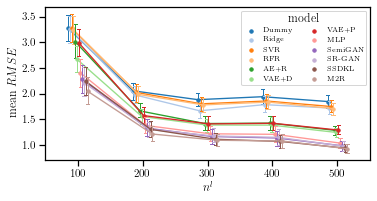

In [220]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 0.75})
width=390
fig, ax = plt.subplots(figsize=set_size(width, fraction=1.0))
#ax.set_ylim((0, 3.1))
g = sns.pointplot(x="n_train_samples",
                  y="rmse",
                  data=df[~df["dataset"].isin(["skillcraft"]) & ~df["n_train_samples"].isin([]) & (df["model"] != "LR")],
                  hue="model", hue_order=["Dummy", "Ridge", "SVR", "RFR", "AE+R", "VAE+D", "VAE+P", "MLP", "SemiGAN", "SR-GAN", "SSDKL", "M2R"],
                  ax=ax,
                  dodge=True,
                  capsize=.05,
                  errwidth=1.0,
                  palette="tab20")
#g.axhline(y=0, xmin=0, xmax=1, color="red", linestyle='dashed')
g.set_xlabel("$n^l$")
g.set_ylabel("mean $RMSE$")
plt.tight_layout()
plt.legend(loc='best', ncol=2, title="model", fontsize="xx-small")
#plt.setp(g.axes.lines ,linewidth=0.5)
plt.savefig(IMAGE_OUTPUT_DIR + "rmse_over_n.pdf")


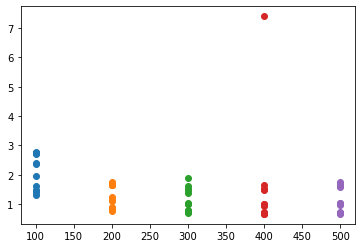

In [43]:
x = [[100, 200, 300, 400, 500]]*13
y = df_decrease.values

plt.plot(x, y, 'o')

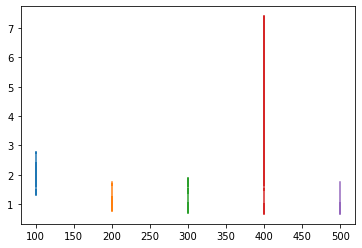

In [44]:
plt.plot([[100, 200, 300, 400, 500]]*13, df_decrease.values)

In [45]:
df_res = pd.pivot_table(data=df, values=["rmse"], index=["regressor_name"], columns=["n_train_samples", "dataset"])
res_list = []
for n in range(100, 600, 100):
    df_median = df_res.loc[idx[:], idx["rmse", n]].agg([np.median], axis=1)
    res_list.append(df_median)

df_median_overall = pd.concat(res_list, axis=1)

KeyError: 'regressor_name'

## What does varying the sample size of labeled data points mean?

### Blog

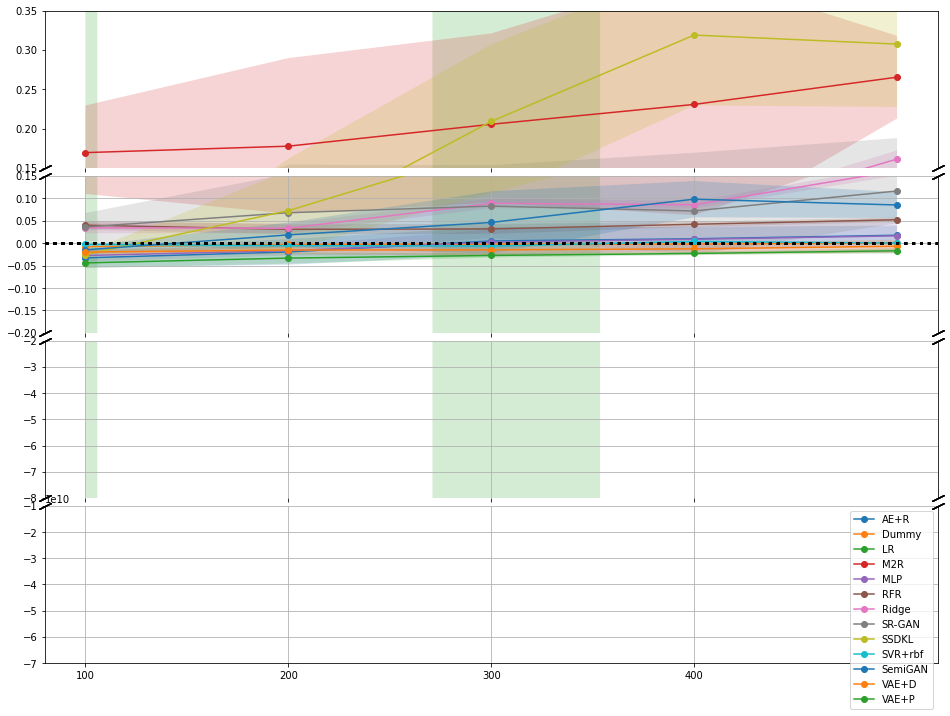

In [46]:
idx = pd.IndexSlice
df_blog = grouped.loc[idx[:, "blog"], :]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True, figsize=(16, 12))
fig.subplots_adjust(hspace=0.05)


for name, group in df_blog.groupby(level=0):
    x = group.index.get_level_values(2)
    y = group.loc[:, "r2"]["mean"].values

    y_err = group.loc[:, "r2"]["std"].values

    ax0.plot(x, y, '-o', label=group.index.get_level_values(0)[0])
    ax0.fill_between(x, y - y_err, y + y_err, alpha=0.2)
    

    ax1.plot(x, y, '-o', label=group.index.get_level_values(0)[0])
    ax1.fill_between(x, y - y_err, y + y_err, alpha=0.2)
    ax1.axhline(y=0, color='k', linestyle=':', linewidth=3)

    ax2.plot(x, y, '-o', label=group.index.get_level_values(0)[0])
    ax2.fill_between(x, y - y_err, y + y_err, alpha=0.2)

    ax3.plot(x, y, '-o', label=group.index.get_level_values(0)[0])
    ax3.fill_between(x, y - y_err, y + y_err, alpha=0.2)
    
    ax0.set_ylim(.15, .35)
    ax1.set_ylim(-.2, .15)
    ax2.set_ylim(-8, -2.)
    ax3.set_ylim(-7e10, -1e10)

    
    ax0.spines.bottom.set_visible(False)
    ax0.tick_params(labeltop=False)

    ax1.spines.top.set_visible(False)
    ax1.spines.bottom.set_visible(False)
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top

    ax2.spines.top.set_visible(False)
    ax2.spines.bottom.set_visible(False)
    ax2.tick_params(labeltop=False)

    ax3.spines.top.set_visible(False)
    ax3.xaxis.tick_top()
    ax3.set_xticks(np.arange(0, 500, 100))
    ax3.xaxis.tick_bottom()

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    
    ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
    ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
    ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)
    
    plt.legend()
    ax1.grid(visible=True)
    ax2.grid(visible=True)
    ax3.grid(visible=True)

plt.show()

In [47]:
def plot_varying_labeled(df: pd.DataFrame, dataset: str, metric: str):
    idx = pd.IndexSlice
    df = grouped.loc[idx[["ssdkl", "m2vae"], ds], :]

    fig, ax = plt.subplots(figsize=(12, 8))

    for model, df_model in df.groupby(level=0):
        x = df_model.index.get_level_values(2)
        y = df_model.loc[:, metric]["mean"].values
        y_std = df_model.loc[:, metric]["std"].values

        ax.plot(x, y, '-o', label=df_model.index.get_level_values(0)[0])
        ax.fill_between(x, y - y_std, y + y_std, alpha=0.6)
        ax.legend()
        plt.title(metric + ' ' + dataset)


In [48]:
df[(df["model"].isin(["M2R", "SemiGAN", "SSDKL", "SR-GAN"])) & (df["dataset"] == "ctslice")]

,model,dataset,n_train_samples,rmse,r2,mae,mape
4500,SSDKL,ctslice,300,0.604615,0.899038,0.307110,3.477120
4501,SSDKL,ctslice,300,0.567601,0.908437,0.319308,1.560016
4502,SSDKL,ctslice,300,0.616902,0.891678,0.342077,1.619210
4503,SSDKL,ctslice,300,0.618770,0.888991,0.301165,1.221247
4504,SSDKL,ctslice,300,0.561712,0.909878,0.292124,1.132739
...,...,...,...,...,...,...,...
6492,M2R,ctslice,100,1.040421,0.903977,0.597797,0.916199
6502,M2R,ctslice,100,1.093774,0.893540,0.620508,1.130159
6511,M2R,ctslice,100,1.068729,0.895480,0.588616,1.155030
6525,M2R,ctslice,100,1.025405,0.903361,0.562398,0.769389


In [49]:
df[(df["model"].isin(["M2R", "SemiGAN", "SSDKL", "SR-GAN", "RFR", "Ridge", "MLP", "LR"])) & (df["dataset"] == ds)]

,model,dataset,n_train_samples,rmse,r2,mae,mape
1500,Ridge,ctslice,100,4.192445,-0.553869,3.035855,0.943439
1501,Ridge,ctslice,100,4.091004,-0.538237,2.958672,0.923270
1502,Ridge,ctslice,100,4.094945,-0.534477,2.961967,1.140992
1503,Ridge,ctslice,100,4.184289,-0.558026,3.029660,1.993641
1504,Ridge,ctslice,100,4.198913,-0.563973,3.042266,1.024974
...,...,...,...,...,...,...,...
8404,MLP,ctslice,100,1.551601,0.786442,1.104554,2.488935
8405,MLP,ctslice,100,1.615305,0.767812,1.198580,15.580195
8406,MLP,ctslice,100,1.729446,0.726298,1.266047,7.084446
8410,MLP,ctslice,100,1.413562,0.816349,0.954945,0.973367


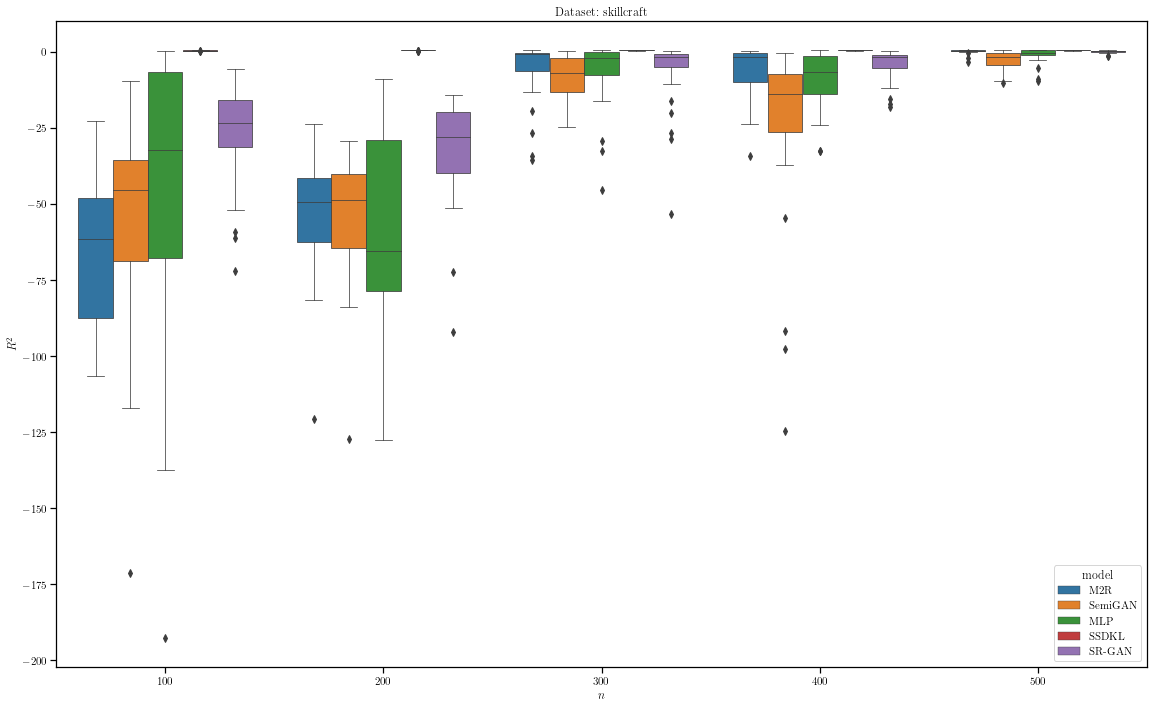

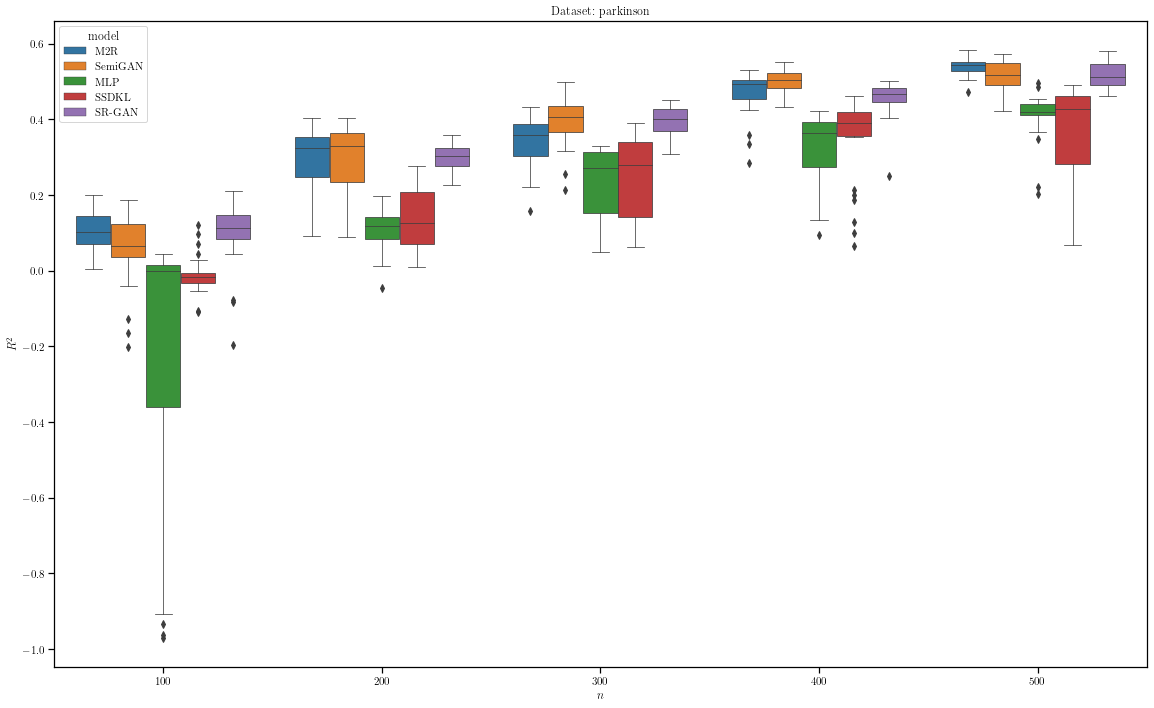

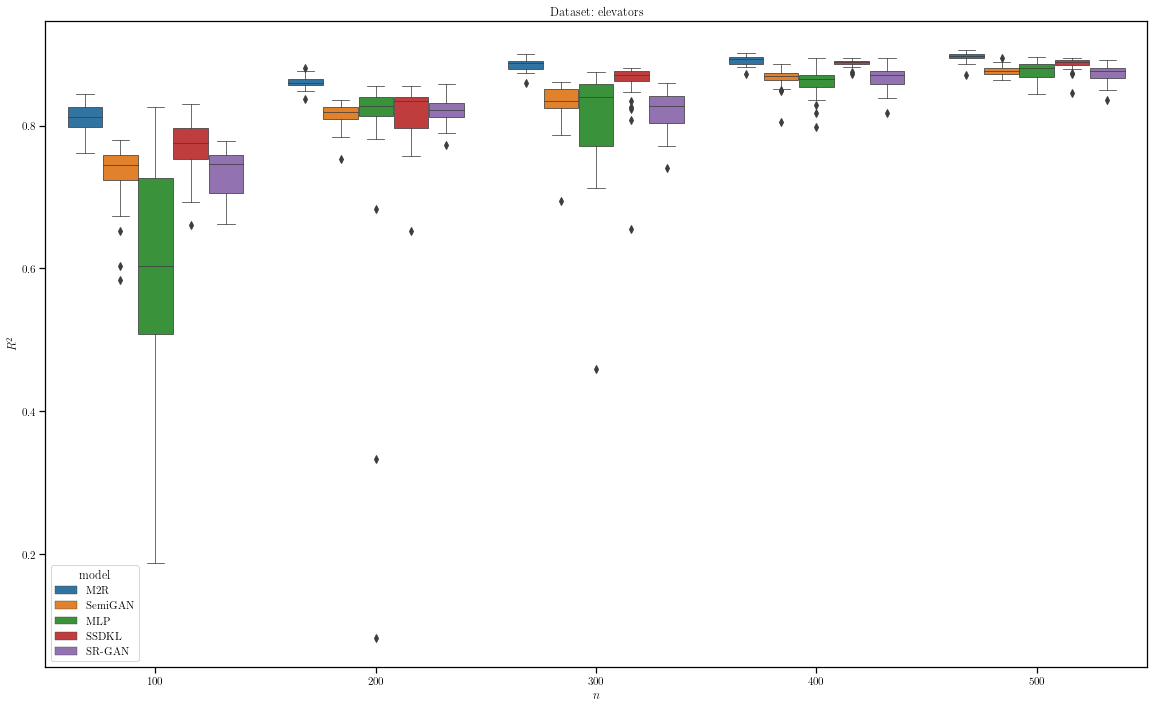

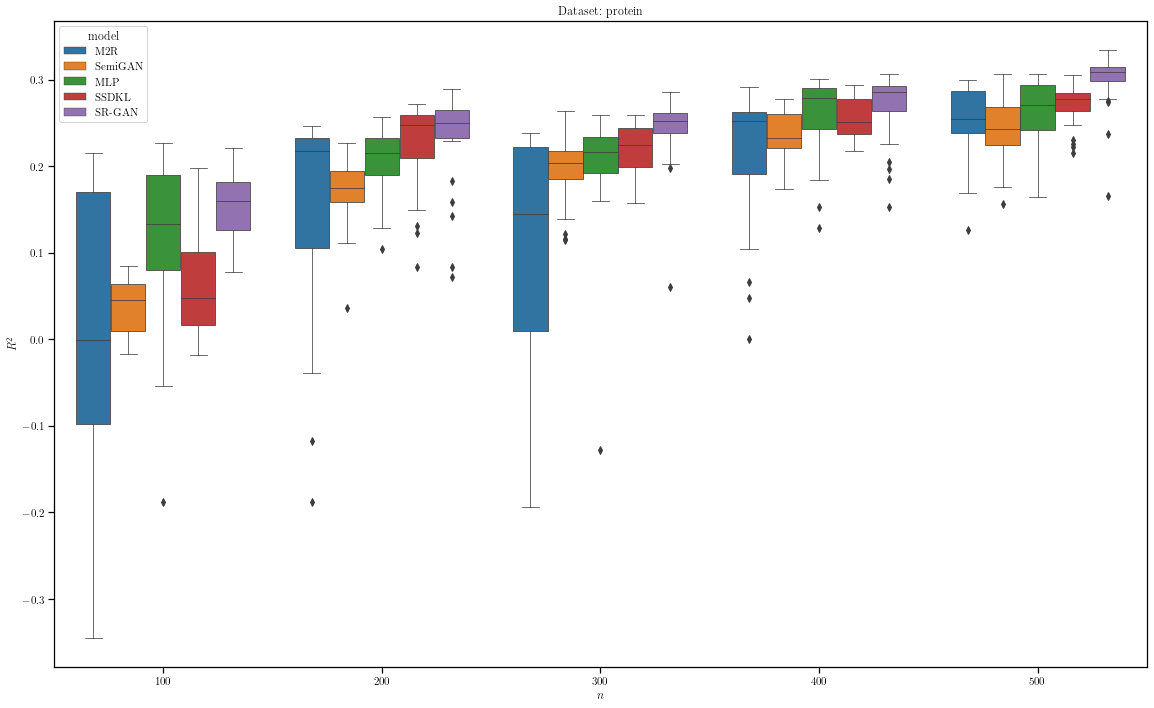

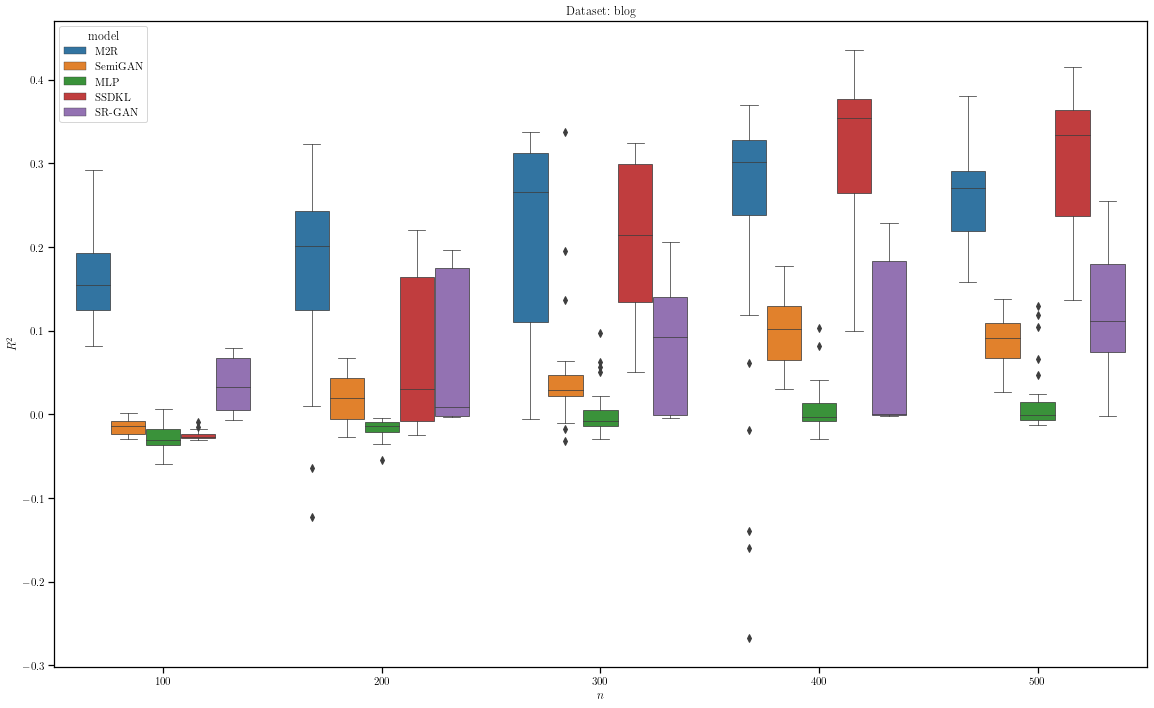

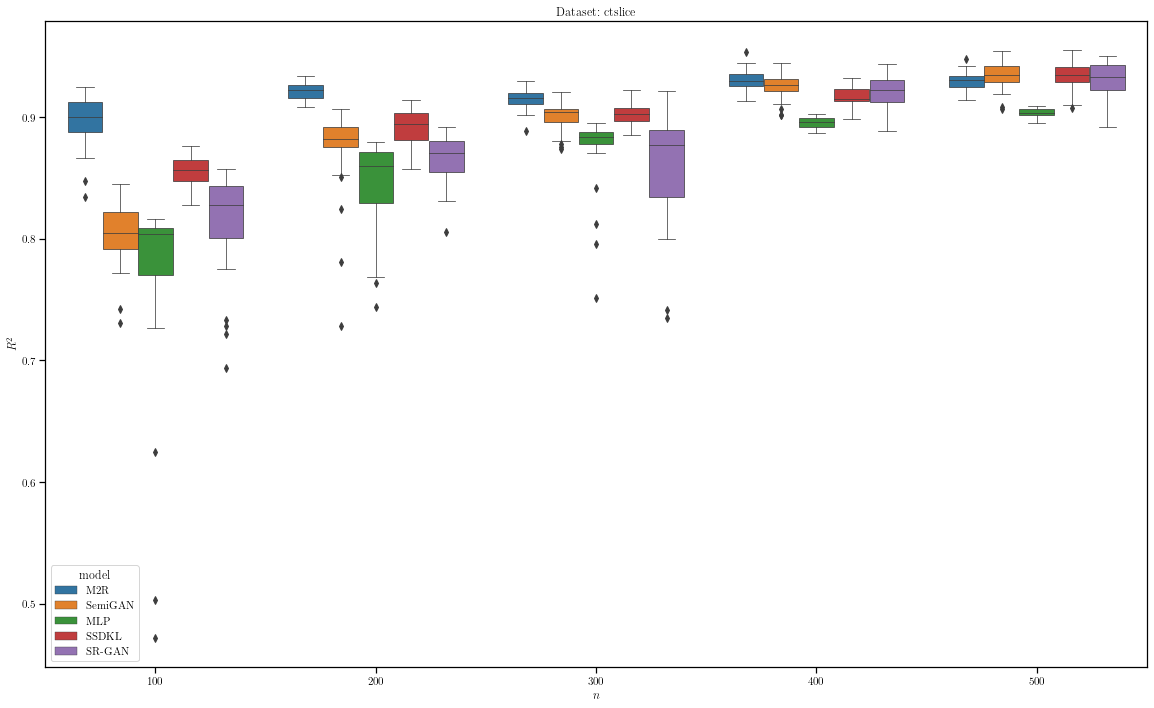

In [225]:
order = ["M2R","SemiGAN", "MLP", "SSDKL", "SR-GAN"]
for ds in DATASETS:
    data = df[(df["model"].isin(order)) & (df["dataset"] == ds)]
    fig, ax = plt.subplots(figsize=set_size(width, fraction=3.0))
    p = sns.boxplot(ax=ax, x="n_train_samples", y="r2", hue="model", dodge=True, data=data, hue_order=order)
    ax.set_xlabel("$n$")
    ax.set_ylabel("$R^2$")
    ax.set_title(f"Dataset: {ds}")
    plt.tight_layout()
#plt.savefig(IMAGE_OUTPUT_DIR + "protein_r2_over_n_boxplot.pdf")

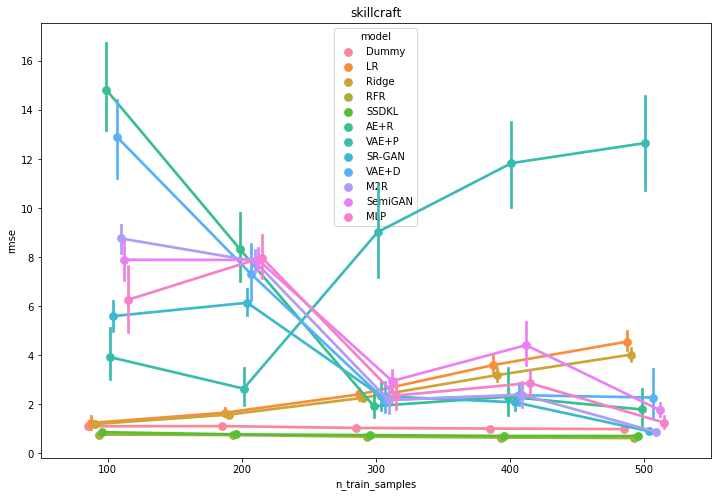

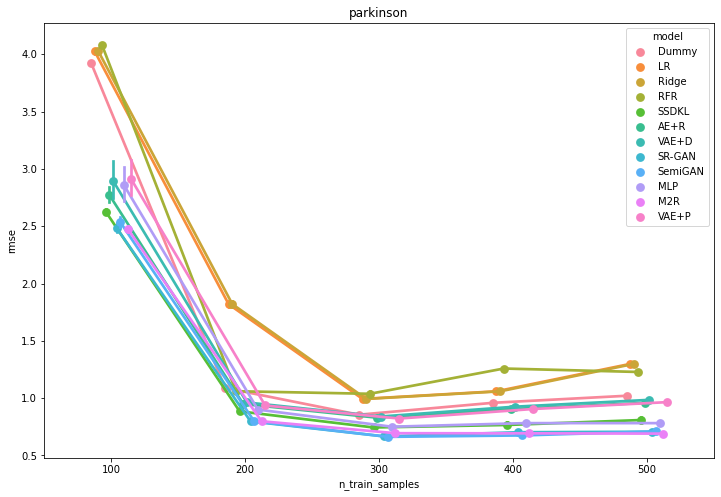

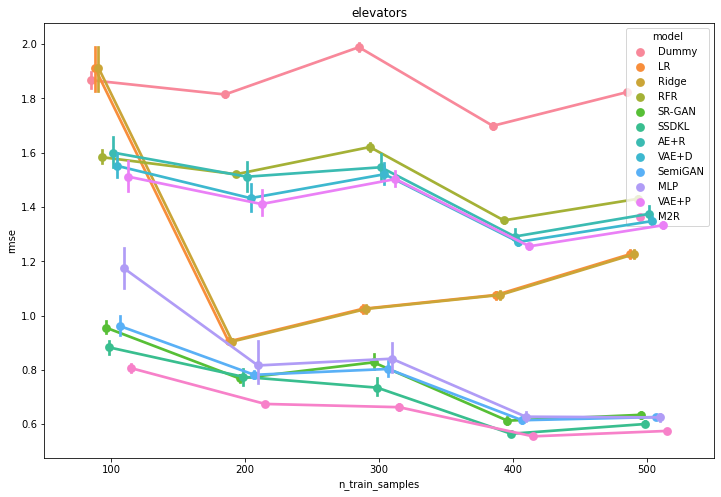

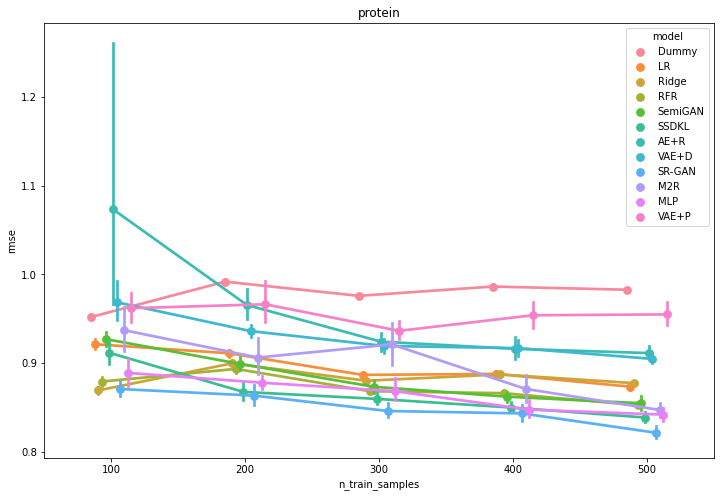

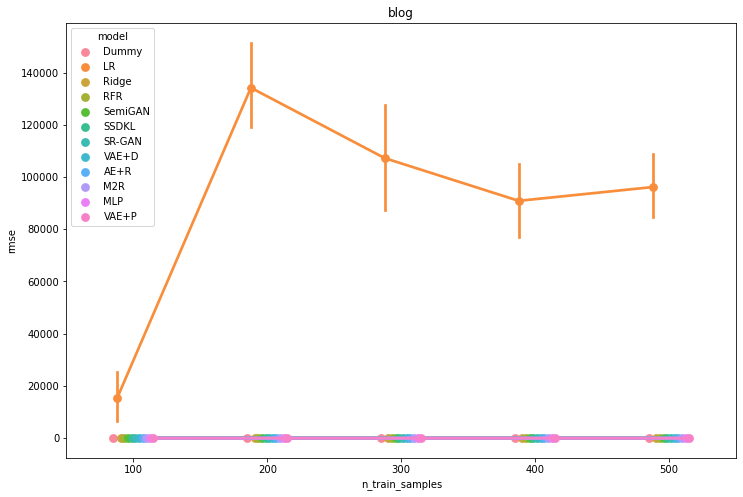

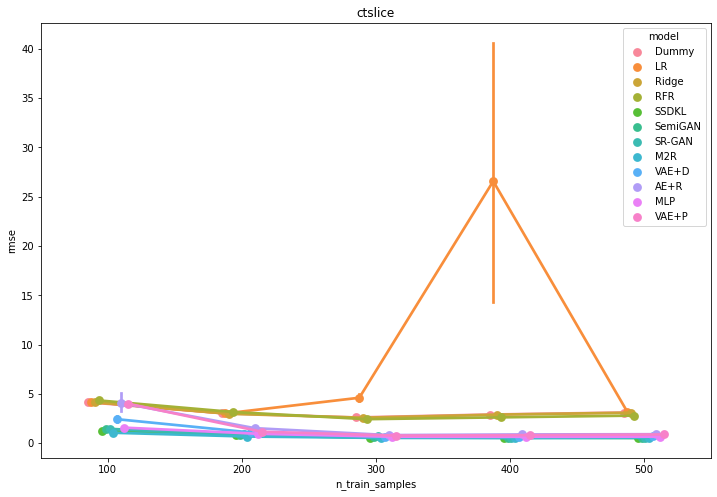

In [66]:
MODELS = ["M2R", "SSDKL", "SR-GAN", "SemiGAN", "MLP", "VAE+D", "VAE+P", "AE+R", "RFR", "SVR", "LR", "Ridge", "Dummy"]
for ds in DATASETS:
    data = df[(df["dataset"] == ds) & df["model"].isin(MODELS)]
    #print(data)
    fig, ax = plt.subplots(figsize=(12, 8))
    p = sns.pointplot(ax=ax, x="n_train_samples", y="rmse", hue="model", dodge=True, data=data).set(title=ds)

<ipython-input-52-c86889479dc5>:2: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_blog = grouped.loc[idx[["ssdkl", "m2vae", "semigan", "srgan"], "protein"], :]


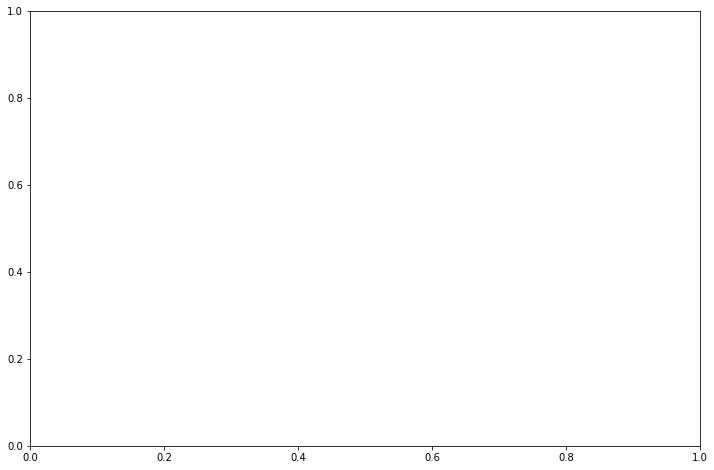

In [52]:
idx = pd.IndexSlice
df_blog = grouped.loc[idx[["ssdkl", "m2vae", "semigan", "srgan"], "protein"], :]
df_blog


fig, ax = plt.subplots(figsize=(12, 8))
for model, df_model in df_blog.groupby(level=0):
    x = df_model.index.get_level_values(2)
    y = df_model.loc[:, "r2"]["mean"].values
    y_std = df_model.loc[:, "r2"]["std"].values


    ax.plot(x, y, '-o')
    ax.fill_between(x, y - y_std, y + y_std, alpha=0.5)


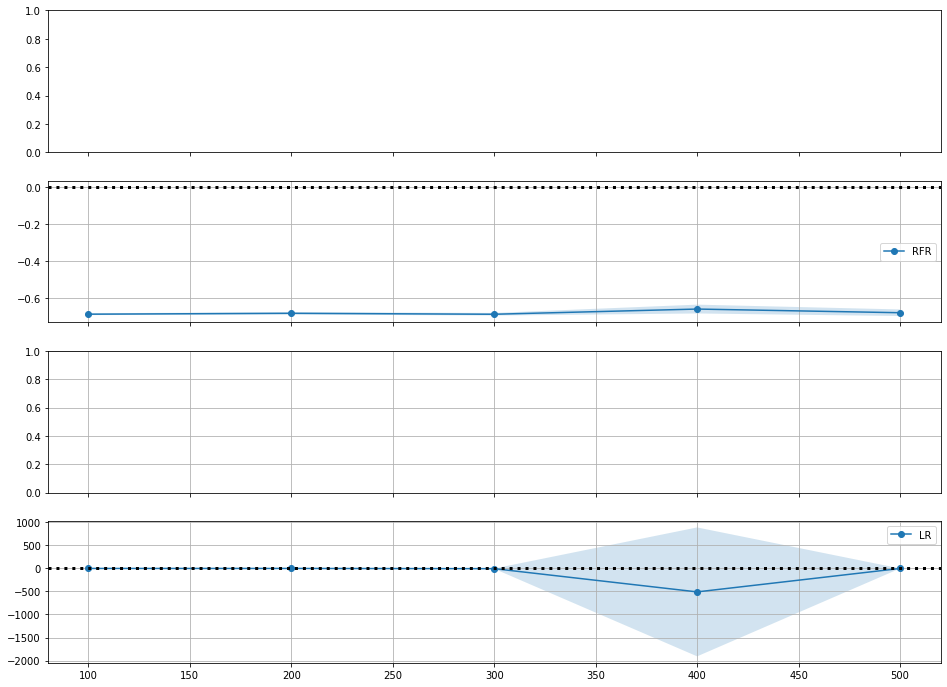

In [53]:
idx = pd.IndexSlice
df_blog = grouped.loc[idx[:, "ctslice"], :]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True, figsize=(16, 12))
#fig.subplots_adjust(hspace=0.05)


for name, group in df_blog.groupby(level=0):
    x = group.index.get_level_values(2)
    if name in ("ssdkl", "m2vae"):
        y0 = group.loc[:, "r2"]["mean"].values
        y_err = group.loc[:, "r2"]["std"].values
        ax0.plot(x, y0, '-o', label=group.index.get_level_values(0)[0])
        ax0.fill_between(x, y1 - y_err, y1 + y_err, alpha=0.2)
        ax0.axhline(y=0, color='k', linestyle=':', linewidth=3)
        ax0.legend()
    if name in ("RFR", "mlp", "autoencoderregressor", "semigan", "srgan", "probabilisticencoder", "deterministicencoder"):
        y1 = group.loc[:, "r2"]["mean"].values
        y_err = group.loc[:, "r2"]["std"].values
        ax1.plot(x, y1, '-o', label=group.index.get_level_values(0)[0])
        ax1.fill_between(x, y1 - y_err, y1 + y_err, alpha=0.2)
        ax1.axhline(y=0, color='k', linestyle=':', linewidth=3)
        ax1.legend()
    elif name == "SVR":
        y2 = group.loc[:, "r2"]["mean"].values
        y_err = group.loc[:, "r2"]["std"].values
        ax2.plot(x, y2, '-o', label=group.index.get_level_values(0)[0])
        ax2.fill_between(x, y2 - y_err, y2 + y_err, alpha=0.2)
        ax2.axhline(y=0, color='k', linestyle=':', linewidth=3)
        ax2.legend()
    elif name == "LR":
        y3 = group.loc[:, "r2"]["mean"].values
        y_err = group.loc[:, "r2"]["std"].values
        ax3.plot(x, y3, '-o', label=group.index.get_level_values(0)[0])
        ax3.fill_between(x, y3 - y_err, y3 + y_err, alpha=0.2)
        ax3.axhline(y=0, color='k', linestyle=':', linewidth=3)
        ax3.legend()


    
    #ax1.set_ylim(-.2, .4)
    #ax2.set_ylim(-8, -2.)
    #ax3.set_ylim(-7e10, -1e10)

    

    
    #ax1.spines.bottom.set_visible(False)
    #ax1.tick_params(labeltop=False)  # don't put tick labels at the top

    #ax2.spines.top.set_visible(False)
    #ax2.spines.bottom.set_visible(False)
    #ax2.tick_params(labeltop=False)

    #ax3.spines.top.set_visible(False)
    #ax3.xaxis.tick_top()
    #ax3.set_xticks(np.arange(0, 500, 100))
    #ax3.xaxis.tick_bottom()

    #d = .5  # proportion of vertical to horizontal extent of the slanted line
    #kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
    #         linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    
    #ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    #ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    #ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
    #ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)
    
    #plt.legend()
    ax1.grid(visible=True)
    ax2.grid(visible=True)
    ax3.grid(visible=True)

plt.show()

In [54]:
np.arange(0, 500, 100)

array([  0, 100, 200, 300, 400])

In [55]:
months = np.arange(1, 13)
np.tile(months, 5).reshape(5, 12)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [56]:
df_blog

rmse                  r2            \
                                   mean       std      mean       std   
model dataset n_train_samples                                           
AE+R  ctslice 100              4.097846  2.693926 -1.129007  4.054457   
              200              1.536316  0.391730  0.585146  0.235645   
              300              0.833077  0.093731  0.801670  0.048348   
              400              0.897837  0.186543  0.799738  0.092422   
              500              0.923080  0.142091  0.814300  0.062232   
...                                 ...       ...       ...       ...   
VAE+P ctslice 100              4.016650  0.231605 -0.444982  0.153117   
              200              1.173568  0.263526  0.760004  0.144190   
              300              0.785022  0.111190  0.822733  0.058570   
              400              0.827329  0.041540  0.836041  0.016863   
              500              0.898278  0.097907  0.826207  0.045492   

                                    mae                mape            
                                   mean       std      mean       std  
model dataset n_train_samples                                          
AE+R  ctslice 100              2.271278  1.673084  4.334968  8.698392  
              200              1.012114  0.320940  2.601740  3.486155  
              300              0.504195  0.090163  5.394814  7.297804  
              400              0.560502  0.129393  3.198271  7.235153  
              500              0.591382  0.122873  3.238964  6.078479  
...                                 ...       ...       ...       ...  
VAE+P ctslice 100              2.744421  0.352819  2.122103  2.912523  
              200              0.684639  0.152259  1.887754  1.036815  
              300              0.455312  0.088408  6.106877  8.569101  
              400              0.458729  0.056645  3.151442  6.746850  
              500              0.490730  0.078869  2.984980  4.939989  

[65 rows x 8 columns]

In [57]:
for index in grouped.index:
    print(index)

('AE+R', 'blog', 100)
('AE+R', 'blog', 200)
('AE+R', 'blog', 300)
('AE+R', 'blog', 400)
('AE+R', 'blog', 500)
('AE+R', 'ctslice', 100)
('AE+R', 'ctslice', 200)
('AE+R', 'ctslice', 300)
('AE+R', 'ctslice', 400)
('AE+R', 'ctslice', 500)
('AE+R', 'elevators', 100)
('AE+R', 'elevators', 200)
('AE+R', 'elevators', 300)
('AE+R', 'elevators', 400)
('AE+R', 'elevators', 500)
('AE+R', 'parkinson', 100)
('AE+R', 'parkinson', 200)
('AE+R', 'parkinson', 300)
('AE+R', 'parkinson', 400)
('AE+R', 'parkinson', 500)
('AE+R', 'protein', 100)
('AE+R', 'protein', 200)
('AE+R', 'protein', 300)
('AE+R', 'protein', 400)
('AE+R', 'protein', 500)
('AE+R', 'skillcraft', 100)
('AE+R', 'skillcraft', 200)
('AE+R', 'skillcraft', 300)
('AE+R', 'skillcraft', 400)
('AE+R', 'skillcraft', 500)
('Dummy', 'blog', 100)
('Dummy', 'blog', 200)
('Dummy', 'blog', 300)
('Dummy', 'blog', 400)
('Dummy', 'blog', 500)
('Dummy', 'ctslice', 100)
('Dummy', 'ctslice', 200)
('Dummy', 'ctslice', 300)
('Dummy', 'ctslice', 400)
('Dummy', '

In [58]:
df_list

[    regressor_name     dataset  n_train_samples  run       mse      rmse  \
 0            Dummy  skillcraft              100    0  1.170353  1.081828   
 1            Dummy  skillcraft              100    1  1.325403  1.151261   
 2            Dummy  skillcraft              100    2  1.176415  1.084627   
 3            Dummy  skillcraft              100    3  1.168235  1.080849   
 4            Dummy  skillcraft              100    4  1.248608  1.117411   
 ..             ...         ...              ...  ...       ...       ...   
 895          Dummy        blog              500   25  5.257810  2.292991   
 896          Dummy        blog              500   26  5.510128  2.347366   
 897          Dummy        blog              500   27  5.890149  2.426963   
 898          Dummy        blog              500   28  5.690848  2.385550   
 899          Dummy        blog              500   29  5.150322  2.269432   
 
      explained_variance       mae  mape        r2  
 0          0.000000e

In [59]:
df_rf = df_list[0]
df_svr = df_list[1]
df_lr = df_list[2]

dataset = "blog"
n_samples = 400

rf_rmse = df_rf[(df_rf["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()
svr_rmse = df_svr[(df_svr["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()
lr_rmse = df_lr[(df_lr["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()

rf_rmse.mean(), svr_rmse.mean()

<ipython-input-59-2c79a2fb791a>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_rmse = df_rf[(df_rf["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()
<ipython-input-59-2c79a2fb791a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  svr_rmse = df_svr[(df_svr["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()
<ipython-input-59-2c79a2fb791a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_rmse = df_lr[(df_lr["dataset"] == dataset) & (df["n_train_samples"] == n_samples)]["rmse"].to_numpy()


(3.143517502148946, 3.0029719432195026)

In [60]:
wilcoxon(svr_rmse, rf_rmse)


WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)

In [61]:
res = []
for df in df_list:
    df_sk = df[df["dataset"] == "protein"][["regressor_name", "dataset", "n_train_samples", "rmse", "r2"]]
    res.append(df_sk)

df_skillcraft = pd.concat(res)
df_grouped = df_skillcraft.groupby(by=["regressor_name", "n_train_samples"]).agg([np.mean, np.std])

df_grouped

<ipython-input-61-22c7f96b03c8>:7: FutureWarning: ['dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped = df_skillcraft.groupby(by=["regressor_name", "n_train_samples"]).agg([np.mean, np.std])


rmse                  r2          
                                    mean       std      mean       std
regressor_name n_train_samples                                        
Dummy          100              0.951871  0.010500 -0.013479  0.007187
               200              0.991764  0.009302 -0.009764  0.005210
               300              0.975765  0.006020 -0.005604  0.002780
               400              0.986254  0.008150 -0.001109  0.001124
               500              0.982646  0.006928 -0.001217  0.001150
LR             100              0.921229  0.016829  0.050660  0.023426
               200              0.911012  0.011034  0.147929  0.013735
               300              0.886616  0.008070  0.169732  0.010241
               400              0.887686  0.010309  0.188954  0.012644
               500              0.873285  0.008830  0.209233  0.008563
RFR            100              0.868852  0.011041  0.155562  0.012344
               200              0.886848  0.010221  0.192535  0.012126
               300              0.860806  0.006523  0.217365  0.008117
               400              0.859189  0.009681  0.240237  0.007662
               500              0.845113  0.007055  0.259415  0.007141
Ridge          100              0.869266  0.010889  0.154798  0.008645
               200              0.899781  0.009109  0.168853  0.006521
               300              0.880083  0.006578  0.181941  0.005651
               400              0.887189  0.008729  0.189903  0.006448
               500              0.877390  0.007638  0.201788  0.005572
SVR+rbf        100              1.060818  0.041422 -0.260598  0.098372
               200              1.025527  0.017062 -0.079953  0.032735
               300              0.977625  0.025527 -0.010143  0.052592
               400              0.947395  0.018590  0.075823  0.036609
               500              0.909411  0.012170  0.142376  0.018464

KeyError: 'SVR'

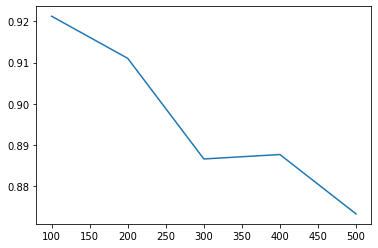

In [62]:
fig, ax = plt.subplots()

n_samples = [100, 200, 300, 400, 500]
ax.plot(n_samples, df_grouped.loc["LR", ("rmse", "mean")].to_numpy())
ax.plot(n_samples, df_grouped.loc["SVR", ("r2", "mean")].to_numpy())
ax.plot(n_samples, df_grouped.loc["RFR", ("r2", "mean")].to_numpy())

<ipython-input-63-3c39c698d54e>:4: FutureWarning: ['regressor_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_agg = df_list[0].groupby(by=["dataset", "n_train_samples"]).agg([np.mean, np.std]).reset_index()
<ipython-input-63-3c39c698d54e>:4: FutureWarning: ['regressor_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_agg = df_list[0].groupby(by=["dataset", "n_train_samples"]).agg([np.mean, np.std]).reset_index()
<ipython-input-63-3c39c698d54e>:4: FutureWarning: ['regressor_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_agg = df_list[0].groupby(by=["dataset", "n_train_samples"]).agg([np.mean, np.std]).reset_index()
<ipython-input-63-3c39c698d54e>:4: FutureWa

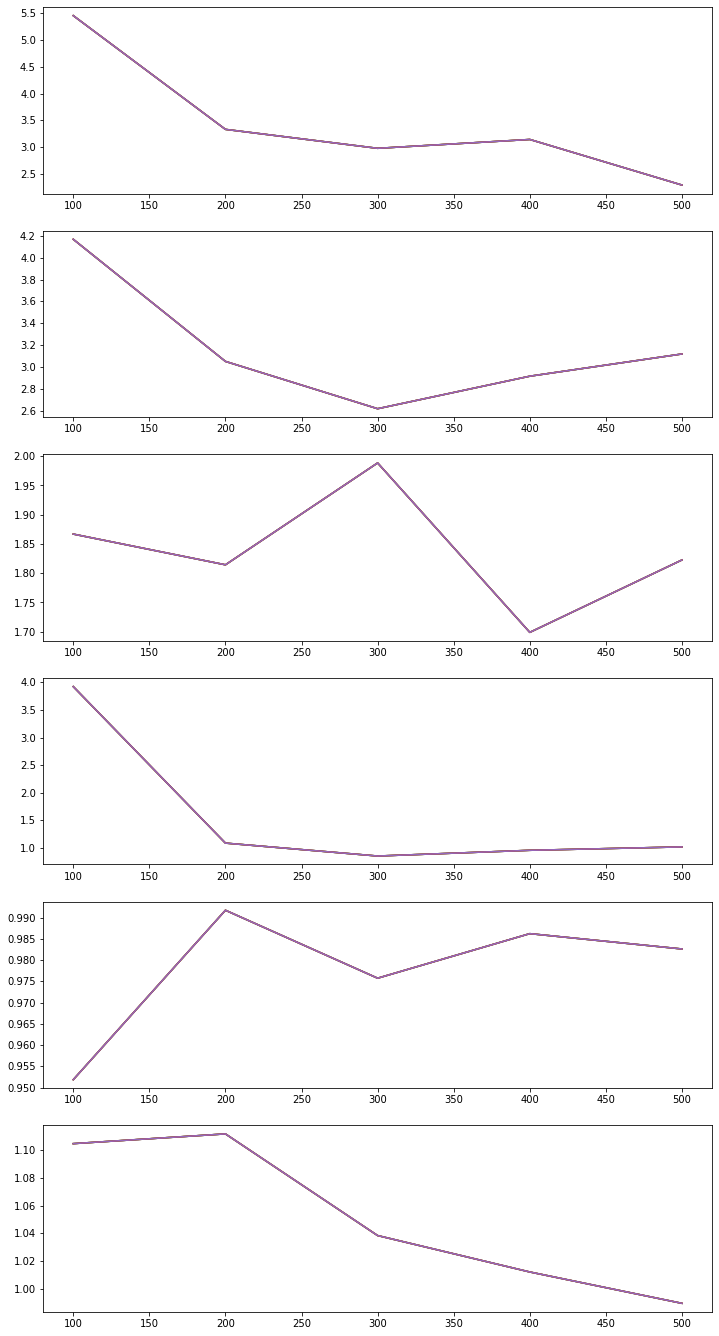

In [63]:
fig, axes = plt.subplots(6, 1, figsize=(12, 24))

for df in df_list:
    df_agg = df_list[0].groupby(by=["dataset", "n_train_samples"]).agg([np.mean, np.std]).reset_index()
    for ax, (key, group) in zip(axes, df_agg.groupby(by="dataset")):
        ax.plot(group["n_train_samples"], group["rmse"]["mean"])
        

In [64]:
grouped["rmse"]["mean"].to_numpy()

array([5.52571584e+00, 3.35843865e+00, 2.96631503e+00, 3.12477350e+00,
       2.27091259e+00, 4.09784598e+00, 1.53631637e+00, 8.33077375e-01,
       8.97837305e-01, 9.23079548e-01, 1.60049558e+00, 1.51159319e+00,
       1.54636646e+00, 1.29136176e+00, 1.37458112e+00, 2.77273085e+00,
       9.48191818e-01, 8.29442881e-01, 9.04801295e-01, 9.58228298e-01,
       1.07339806e+00, 9.65436643e-01, 9.24078317e-01, 9.16003867e-01,
       9.11209311e-01, 1.48459942e+01, 8.33060536e+00, 1.92495646e+00,
       2.31225305e+00, 1.79150978e+00, 5.45825659e+00, 3.33227059e+00,
       2.97800272e+00, 3.14351750e+00, 2.29106932e+00, 4.16790803e+00,
       3.05196123e+00, 2.61964748e+00, 2.91683041e+00, 3.12000070e+00,
       1.86690434e+00, 1.81437482e+00, 1.98852809e+00, 1.69887666e+00,
       1.82269338e+00, 3.92500526e+00, 1.08940055e+00, 8.55405333e-01,
       9.59059266e-01, 1.02064148e+00, 9.51870795e-01, 9.91764168e-01,
       9.75765083e-01, 9.86253832e-01, 9.82645688e-01, 1.10467146e+00,
      

In [65]:
sns.scatterplot(x="n_train_samples", y="rmse", data=grouped, hue="dataset")

ValueError: Data must be 1-dimensional

## Wilcoxon

In [54]:
import itertools

In [241]:
wilcox_models = ["M2R", "SR-GAN", "SSDKL", "SemiGAN", "MLP"]

def print_wilcoxon_p(df, models, dataset: str, n: int, metric: str):
    combinations = list(itertools.combinations(models, 2))
    for combi in combinations:
        a = df[(df["regressor_name"] == combi[0]) & (df["dataset"] == dataset) & (df["n_train_samples"] == n)][metric]
        b = df[(df["regressor_name"] == combi[1]) & (df["dataset"] == dataset) & (df["n_train_samples"] == n)][metric]
        print(combi, wilcoxon(a, b, alternative='greater'))
        


In [242]:
df

,model,dataset,n_train_samples,rmse,r2,mae,mape
0,Dummy,skillcraft,100,1.081828,-0.010153,0.884033,1.000000
1,Dummy,skillcraft,100,1.151261,-0.021616,0.943698,1.000000
2,Dummy,skillcraft,100,1.084627,-0.023942,0.889356,1.000000
3,Dummy,skillcraft,100,1.080849,-0.011767,0.883821,1.000000
4,Dummy,skillcraft,100,1.117411,-0.010153,0.913110,1.000000
...,...,...,...,...,...,...,...
11695,M2R,skillcraft,100,7.541310,-42.836227,0.914519,1.578952
11696,MLP,skillcraft,100,0.837928,0.388878,0.690316,0.970867
11697,M2R,skillcraft,100,8.964700,-68.365265,0.894940,1.589471
11698,MLP,skillcraft,100,9.940840,-75.170319,0.966656,1.620538


In [243]:
metric = "r2"
res_list = []
for n in range(100, 600, 100):
    for dataset in DATASETS:
        combinations = list(itertools.combinations(wilcox_models, 2))
        for combi in combinations:
            a = df[(df["model"] == combi[0]) & (df["dataset"] == dataset) & (df["n_train_samples"] == n)][metric]
            b = df[(df["model"] == combi[1]) & (df["dataset"] == dataset) & (df["n_train_samples"] == n)][metric]

            statistic, pvalue = wilcoxon(a, b)

            res_list.append([dataset, n, metric, combi, statistic, pvalue])

In [244]:
res_dict = {
    "dataset" : [sub_list[0] for sub_list in res_list],
    "n_samples": [sub_list[1] for sub_list in res_list],
    "metric": [sub_list[2] for sub_list in res_list],
    "combi": [sub_list[3] for sub_list in res_list],
    "statistic": [sub_list[4] for sub_list in res_list],
    "pvalue": [sub_list[5] for sub_list in res_list]
}

In [245]:
df_wilcox = pd.DataFrame.from_dict(res_dict)
df_wilcox

,dataset,n_samples,metric,combi,statistic,pvalue
0,skillcraft,100,r2,"(M2R, SR-GAN)",8.0,0.000004
1,skillcraft,100,r2,"(M2R, SSDKL)",0.0,0.000002
2,skillcraft,100,r2,"(M2R, SemiGAN)",152.0,0.097772
3,skillcraft,100,r2,"(M2R, MLP)",121.0,0.021827
4,skillcraft,100,r2,"(SR-GAN, SSDKL)",0.0,0.000002
...,...,...,...,...,...,...
295,ctslice,500,r2,"(SR-GAN, SemiGAN)",177.0,0.253644
296,ctslice,500,r2,"(SR-GAN, MLP)",6.0,0.000003
297,ctslice,500,r2,"(SSDKL, SemiGAN)",216.0,0.734325
298,ctslice,500,r2,"(SSDKL, MLP)",0.0,0.000002


In [246]:
combi_list = []
for combi in df_wilcox["combi"].values:
    if "MLP" in combi:
        combi_list.append(combi)

In [259]:
df_any_vs_mlp = df_wilcox[df_wilcox["combi"].isin(combi_list)]
df_any_vs_mlp.loc[:, ("significant")] = (df_any_vs_mlp["pvalue"] < 0.0125).values
for name, group in df_any_vs_mlp.groupby(by=["dataset", "n_samples"]):
    print(group, "\n\n")

   dataset  n_samples metric           combi  statistic    pvalue  significant
43    blog        100     r2      (M2R, MLP)        0.0  0.000002         True
46    blog        100     r2   (SR-GAN, MLP)        0.0  0.000002         True
48    blog        100     r2    (SSDKL, MLP)      201.0  0.517048        False
49    blog        100     r2  (SemiGAN, MLP)       49.0  0.000160         True 


    dataset  n_samples metric           combi  statistic    pvalue  \
103    blog        200     r2      (M2R, MLP)        9.0  0.000004   
106    blog        200     r2   (SR-GAN, MLP)        0.0  0.000002   
108    blog        200     r2    (SSDKL, MLP)       14.0  0.000007   
109    blog        200     r2  (SemiGAN, MLP)       22.0  0.000015   

     significant  
103         True  
106         True  
108         True  
109         True   


    dataset  n_samples metric           combi  statistic    pvalue  \
163    blog        300     r2      (M2R, MLP)        0.0  0.000002   
166    blog  

<ipython-input-259-c95a78b1f85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_any_vs_mlp.loc[:, ("significant")] = (df_any_vs_mlp["pvalue"] < 0.0125).values


In [227]:
df_ssdkl_m2r = df_wilcox[df_wilcox["combi"] == ("SemiGAN", "MLP")]
df_ssdkl_m2r.loc[:, ("significant")] = (df_ssdkl_m2r["pvalue"] < 0.025).values
for name, group in df_ssdkl_m2r.groupby(by=["dataset"]):
    print(group, "\n\n")

    dataset  n_samples metric           combi  statistic    pvalue  \
100    blog        100     r2  (SemiGAN, MLP)       49.0  0.000160   
226    blog        200     r2  (SemiGAN, MLP)       22.0  0.000015   
352    blog        300     r2  (SemiGAN, MLP)       80.0  0.001709   
478    blog        400     r2  (SemiGAN, MLP)        7.0  0.000004   
604    blog        500     r2  (SemiGAN, MLP)       21.0  0.000014   

     significant  
100         True  
226         True  
352         True  
478         True  
604         True   


     dataset  n_samples metric           combi  statistic    pvalue  \
121  ctslice        100     r2  (SemiGAN, MLP)      147.0  0.078647   
247  ctslice        200     r2  (SemiGAN, MLP)       77.0  0.001382   
373  ctslice        300     r2  (SemiGAN, MLP)       16.0  0.000008   
499  ctslice        400     r2  (SemiGAN, MLP)        0.0  0.000002   
625  ctslice        500     r2  (SemiGAN, MLP)        0.0  0.000002   

     significant  
121        False

<ipython-input-227-bb9375a6c6d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ssdkl_m2r.loc[:, ("significant")] = (df_ssdkl_m2r["pvalue"] < 0.025).values


In [60]:
df_wilcox[(df_wilcox["n_samples"] == 100) & (df_wilcox["dataset"] == "protein")]

,dataset,n_samples,metric,combi,statistic,pvalue
63,protein,100,r2,"(M2R, SR-GAN)",55.0,0.000261
64,protein,100,r2,"(M2R, SSDKL)",105.0,0.008730
65,protein,100,r2,"(M2R, SemiGAN)",214.0,0.703564
66,protein,100,r2,"(M2R, RFR)",68.0,0.000716
67,protein,100,r2,"(M2R, MLP)",95.0,0.004682
68,protein,100,r2,"(M2R, Ridge)",57.0,0.000306
69,protein,100,r2,"(SR-GAN, SSDKL)",26.0,0.000022
70,protein,100,r2,"(SR-GAN, SemiGAN)",5.0,0.000003
71,protein,100,r2,"(SR-GAN, RFR)",146.0,0.075213
72,protein,100,r2,"(SR-GAN, MLP)",145.0,0.071903


In [74]:
for name, group in df_wilcox.groupby(by=["n_samples", "dataset"]):
    print(name, group)

In [75]:
from statsmodels.stats.multitest import multipletests

In [76]:
results_list = []
for group_name, group in df_wilcox.groupby(by=["dataset", "n_samples"]):
    #print(group_name)
    #print(group["combi"])
    rejected, _, _, _ = multipletests(group["pvalue"], method="bonferroni")
    group["rejected"] = rejected
    results_list.append(group)

df_significance = pd.concat(results_list)

ValueError: No objects to concatenate

In [77]:
df_pvalue = df_significance.drop("rejected", axis=1)
df_rej = df_significance.drop("pvalue", axis=1)

NameError: name 'df_significance' is not defined

In [78]:
rej_results = []
pval_results = []
for name, group in df_rej.groupby(by="combi"):
    print(name, group)
    pvt_table = pd.pivot_table(data=group, values="rejected", index="dataset", columns=["combi", "n_samples"])
    rej_results.append(pvt_table)

for name, group in df_pvalue.groupby(by="combi"):
    pvt_table = pd.pivot_table(data=group, values="pvalue", index="dataset", columns=["combi", "n_samples"])
    pval_results.append(pvt_table)

NameError: name 'df_rej' is not defined

In [79]:
color_results = []
for res in rej_results:
    res = res.applymap(lambda x: 'background-color: green!30' if x else 'background-color: red!30')
    color_results.append(res)
res

[    regressor_name  dataset  n_train_samples      rmse        r2
 150          Dummy  protein              100  0.949584 -0.012004
 151          Dummy  protein              100  0.940509 -0.013975
 152          Dummy  protein              100  0.953232 -0.012198
 153          Dummy  protein              100  0.950093 -0.017166
 154          Dummy  protein              100  0.942134 -0.008781
 ..             ...      ...              ...       ...       ...
 295          Dummy  protein              500  0.981811 -0.003648
 296          Dummy  protein              500  0.982529 -0.001600
 297          Dummy  protein              500  0.980015 -0.001388
 298          Dummy  protein              500  0.982709 -0.001240
 299          Dummy  protein              500  0.985353 -0.002004
 
 [150 rows x 5 columns],
     regressor_name  dataset  n_train_samples      rmse        r2
 150          Ridge  protein              100  0.862020  0.166031
 151          Ridge  protein              100  0.

In [80]:
for p, c in zip(pval_results, color_results):
    styled_df = p.style.apply(lambda x: c, axis=None)
    print(styled_df.to_latex(convert_css=True))

In [81]:
import pandas as pd

# Initialize example dataframe
data = {
    'Week': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Color': ['Green', 'Red', 'Green', 'Yellow', 'Red', 'Green', 'Yellow', 'Red', 'Yellow', 'Red'],
    'Part': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'Value': [10, -20, 20, -20, -10, 10, -5, -8, -9, -10]
}
df = pd.DataFrame(data)

# Merge 'Color' and 'Value' columns into one single column
df['Value'] = list(zip(df.Color, df.Value))

# Perform pivot operation
df = df.pivot(index='Part', columns='Week', values='Value')

# Split into two dataframes: a colors dataframe and a numerical values dataframe
color_df = df.applymap(lambda x: x[0])
value_df = df.applymap(lambda x: x[1])

# Transform dataframe with colors into formatting commands
color_df = color_df.applymap(lambda x: f'background-color: {x.lower()}')

# Apply color styling to values dataframe
styled_df = value_df.style.apply(lambda x: color_df, axis=None)

Week,1,2,3,4,5
Part,,,,,
A,background-color: green,background-color: red,background-color: green,background-color: yellow,background-color: red
B,background-color: green,background-color: yellow,background-color: red,background-color: yellow,background-color: red


In [ ]:
significance_results[0]

pvalue                                              rejected  \
combi     (M2R, SR-GAN)                                         (M2R, SR-GAN)   
n_samples           100       200       300       400       500           100   
dataset                                                                         
blog           0.000002  0.001197  0.000189  0.000332  0.000003          True   
ctslice        0.000002  0.000002  0.000002  0.011079  0.813017          True   
elevators      0.000002  0.000002  0.000002  0.000004  0.000003          True   
parkinson      0.503833  0.909931  0.001382  0.028486  0.001197         False   
protein        0.000261  0.000894  0.000011  0.008217  0.000115          True   

                                      
combi                                 
n_samples    200   300    400    500  
dataset                               
blog        True  True   True   True  
ctslice     True  True  False  False  
elevators   True  True   True   True  
parkinson  False  True  False   True  
protein     True  True   True   True

In [ ]:
def style_rejected(v, props):
    return props[0] if v else props[1]

s2 = significance_results[0].style.applymap(style_rejected, props='color:red;')
s2

/home/flo/miniconda3/envs/ssdgm/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
a = df[(df["regressor_name"] == "m2vae") & (df["dataset"] == "parkinson") & (df["n_train_samples"] == 300)]["r2"]
b = df[(df["regressor_name"] == "srgan") & (df["dataset"] == "parkinson") & (df["n_train_samples"] == 300)]["r2"]

In [ ]:
wilcoxon(a, b)

WilcoxonResult(statistic=77.0, pvalue=0.0013820358574399946)

In [ ]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [3, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,3.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [ ]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,3.0,2.0,2.0,2.0,0.50
1,penguin,2.0,1.0,1.0,1.0,0.25
2,dog,4.0,3.0,3.0,3.0,0.75
3,spider,8.0,4.0,4.0,4.0,1.00
4,snake,NaN,NaN,NaN,5.0,NaN
